In [1]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from warnings import filterwarnings
#filterwarnings('ignore')

In [2]:
#read the csv file
data = pd.read_csv("Assignment6.csv",encoding='unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
#we will proceed with data of UK only
data["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [5]:
data = data[data["Country"]=="United Kingdom"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
#selecting only four columns for analysis
data = data[["Quantity","InvoiceDate","UnitPrice","CustomerID"]]

In [7]:
#some customer id is missing but we will do maximum of our analysis by groupby customer id only
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     495478 non-null  int64  
 1   InvoiceDate  495478 non-null  object 
 2   UnitPrice    495478 non-null  float64
 3   CustomerID   361878 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.9+ MB


In [8]:
#some values are mistakely given negative values
data["UnitPrice"] = data["UnitPrice"].apply(lambda x: np.abs(x))
data["Quantity"] = data["Quantity"].apply(lambda x: np.abs(x))

## Monthly Revenue

In [9]:
#converting the type of Invoice Date Field from string to datetime.
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
data['InvoiceYearMonth'] = data['InvoiceDate'].apply(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
data['Revenue'] = data['UnitPrice'] * data['Quantity']
revenue = data.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
#percentage change from previous month is growth
revenue["Monthly Growth"] = revenue["Revenue"].pct_change()
revenue

,InvoiceYearMonth,Revenue,Monthly Growth
0,201012,819795.340,NaN
1,201101,688271.660,-0.160435
2,201102,451807.990,-0.343562
3,201103,612753.170,0.356225
4,201104,510781.481,-0.166416
5,201105,682168.860,0.335540
6,201106,684542.990,0.003480
7,201107,638509.841,-0.067247
8,201108,676964.460,0.060226
9,201109,932134.792,0.376933


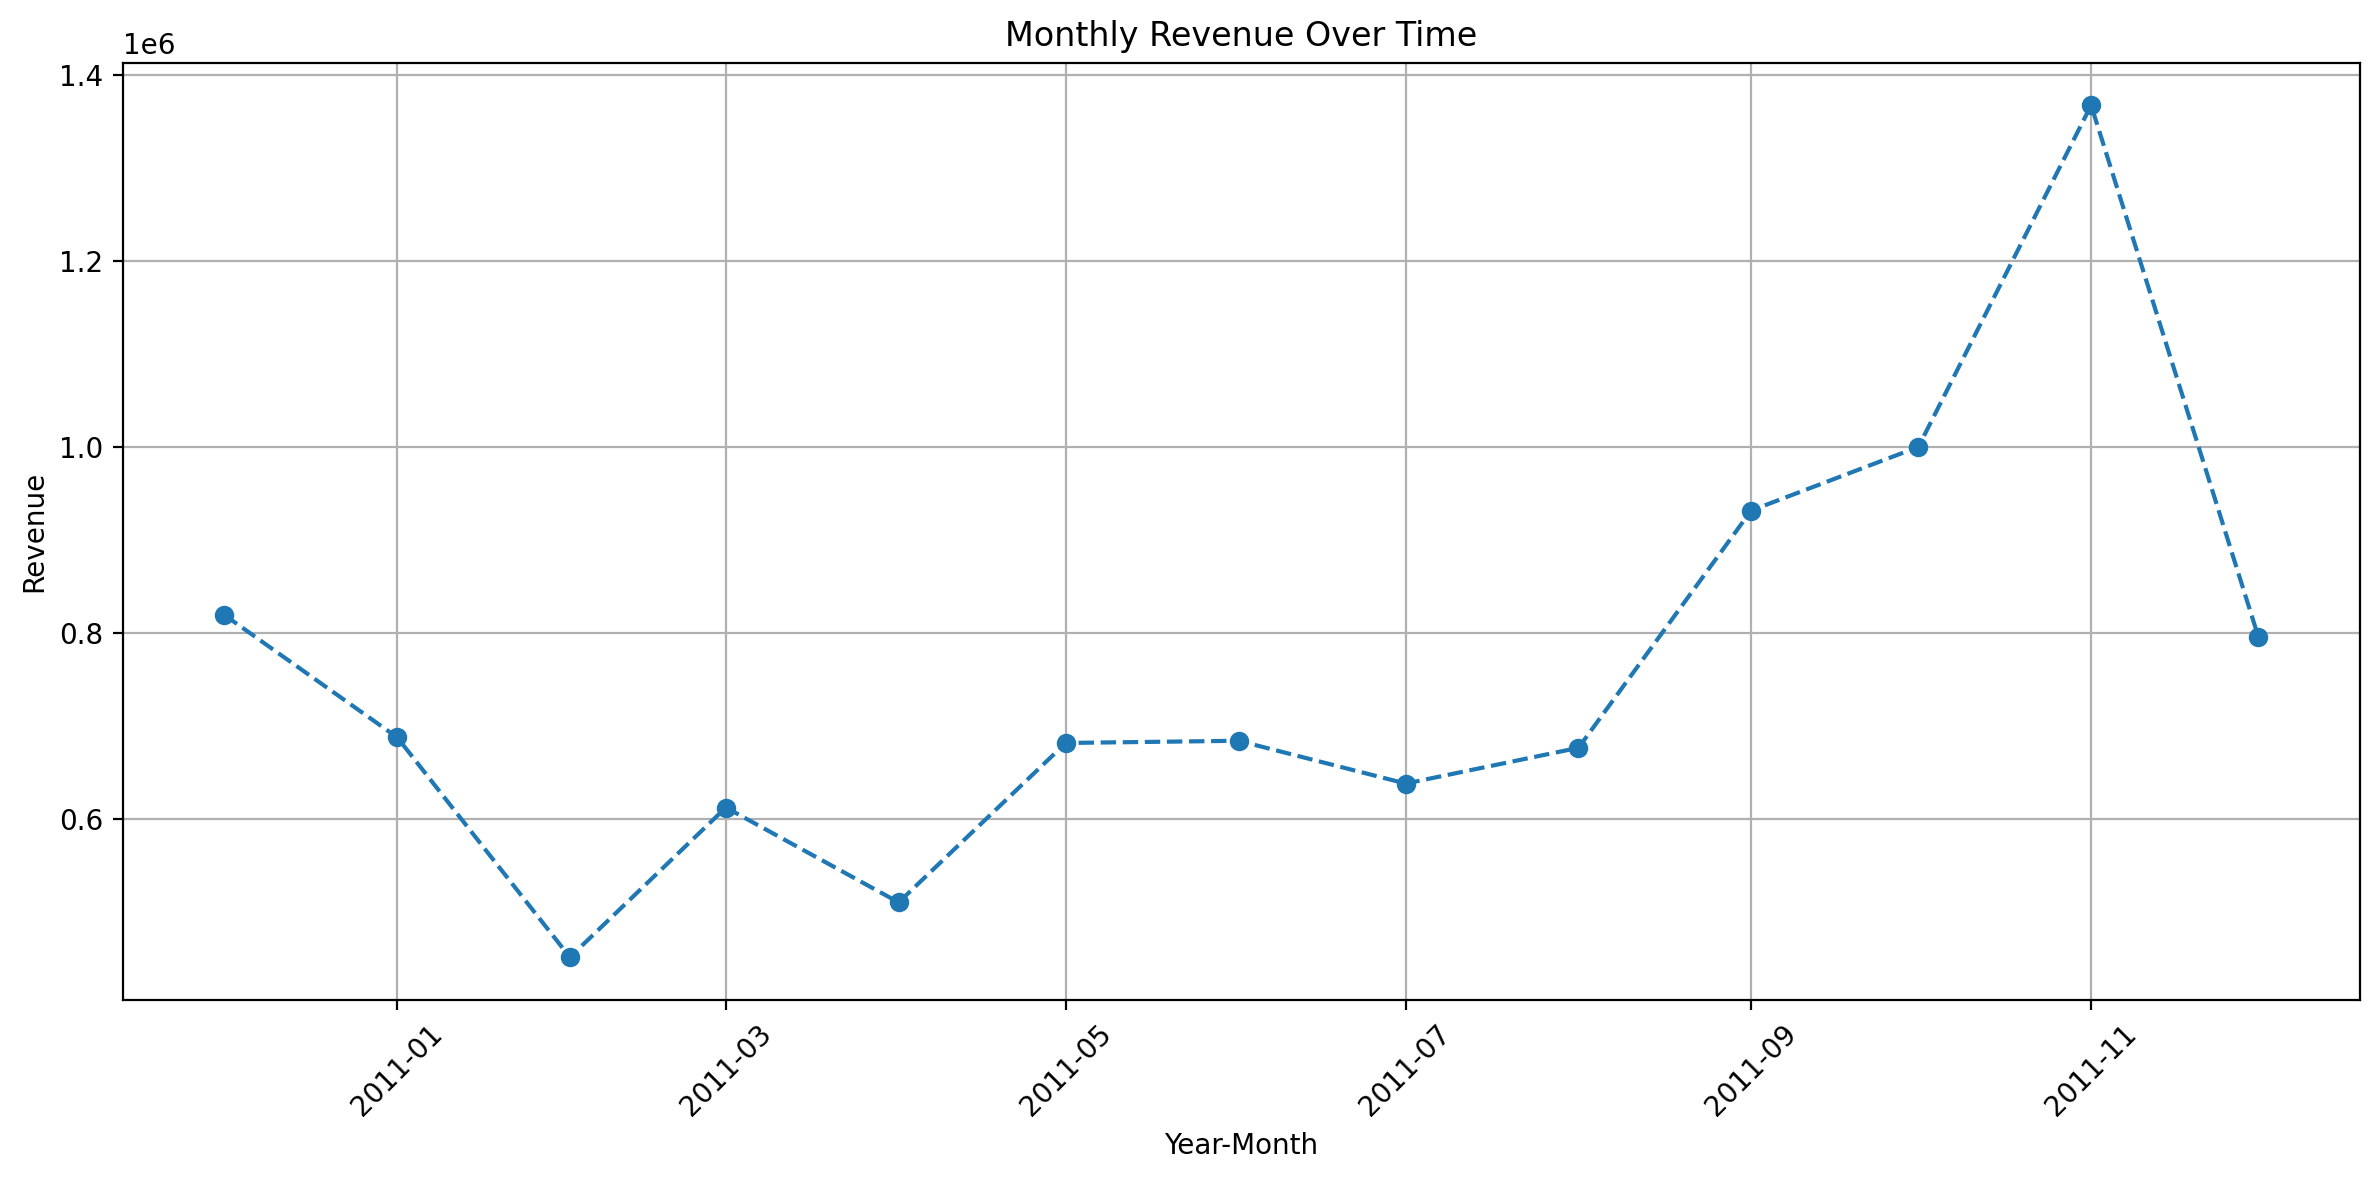

In [10]:
#convert back into proper format
#%Y means take 4 number here as year and %m means take two number here as months
revenue['InvoiceYearMonth'] = pd.to_datetime(revenue['InvoiceYearMonth'], format='%Y%m')

# Plot the data
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(revenue['InvoiceYearMonth'], revenue['Revenue'], marker='o', linestyle='--')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

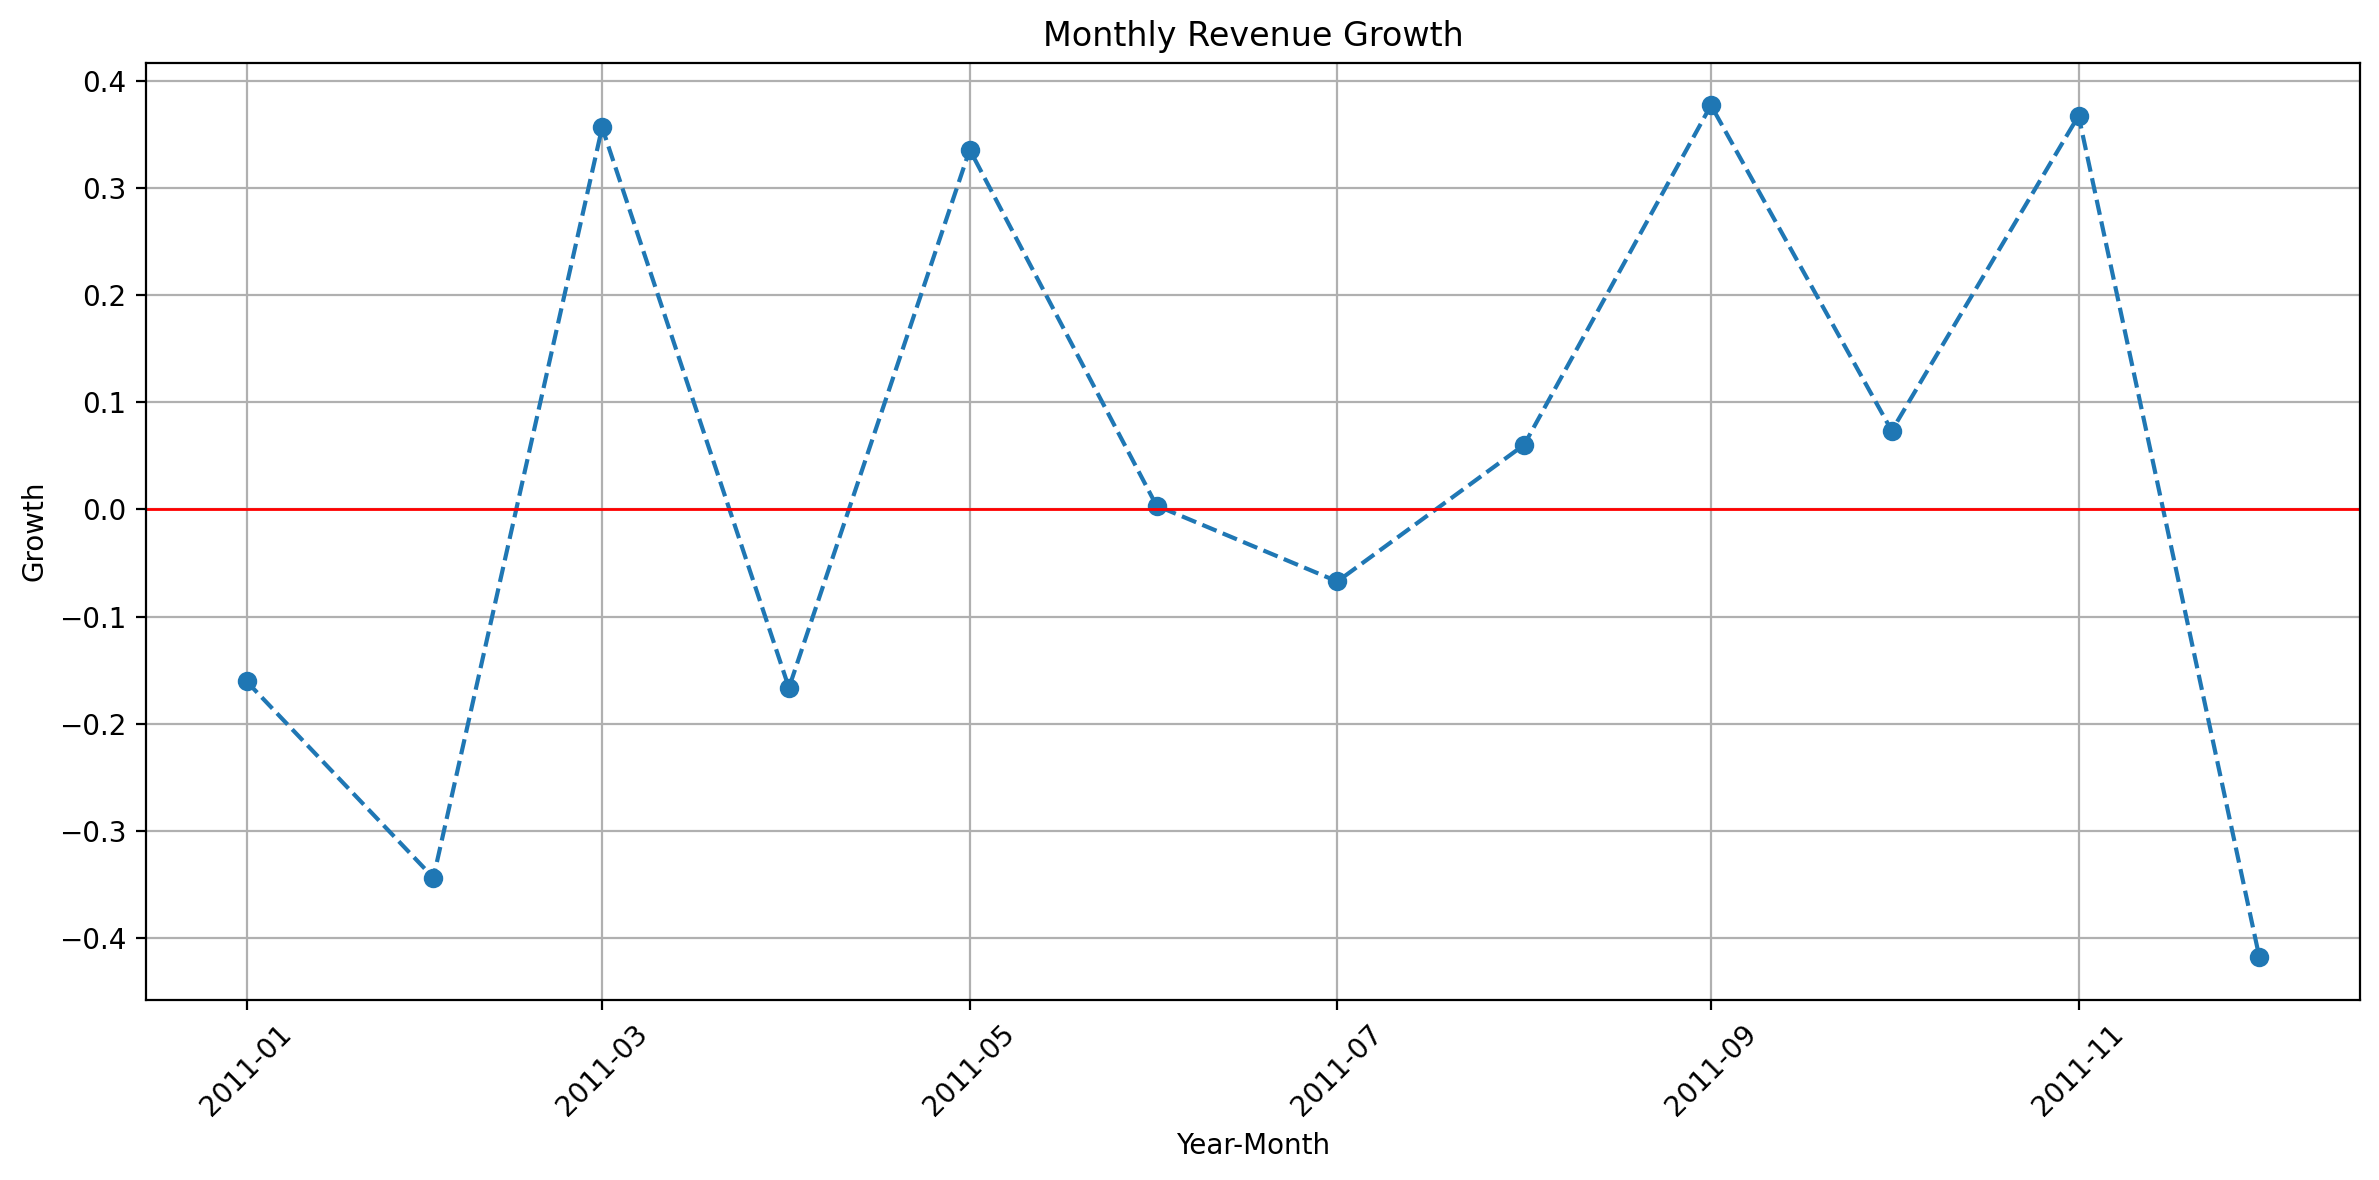

In [11]:
# Plot the data
revenue['InvoiceYearMonth'] = pd.to_datetime(revenue['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(revenue['InvoiceYearMonth'], revenue['Monthly Growth'], marker='o', linestyle='--')
plt.axhline(0, color='r', linestyle='-', linewidth=1, label='Zero Growth Line')
plt.title('Monthly Revenue Growth')
plt.xlabel('Year-Month')
plt.ylabel('Growth')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Monthly Active Users

In [12]:
#creating monthly active customers dataframe by counting unique Customer IDs
monthly_active = data.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

monthly_active.columns = ["InvoiceYearMonth","Active Users"]

monthly_active

,InvoiceYearMonth,Active Users
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


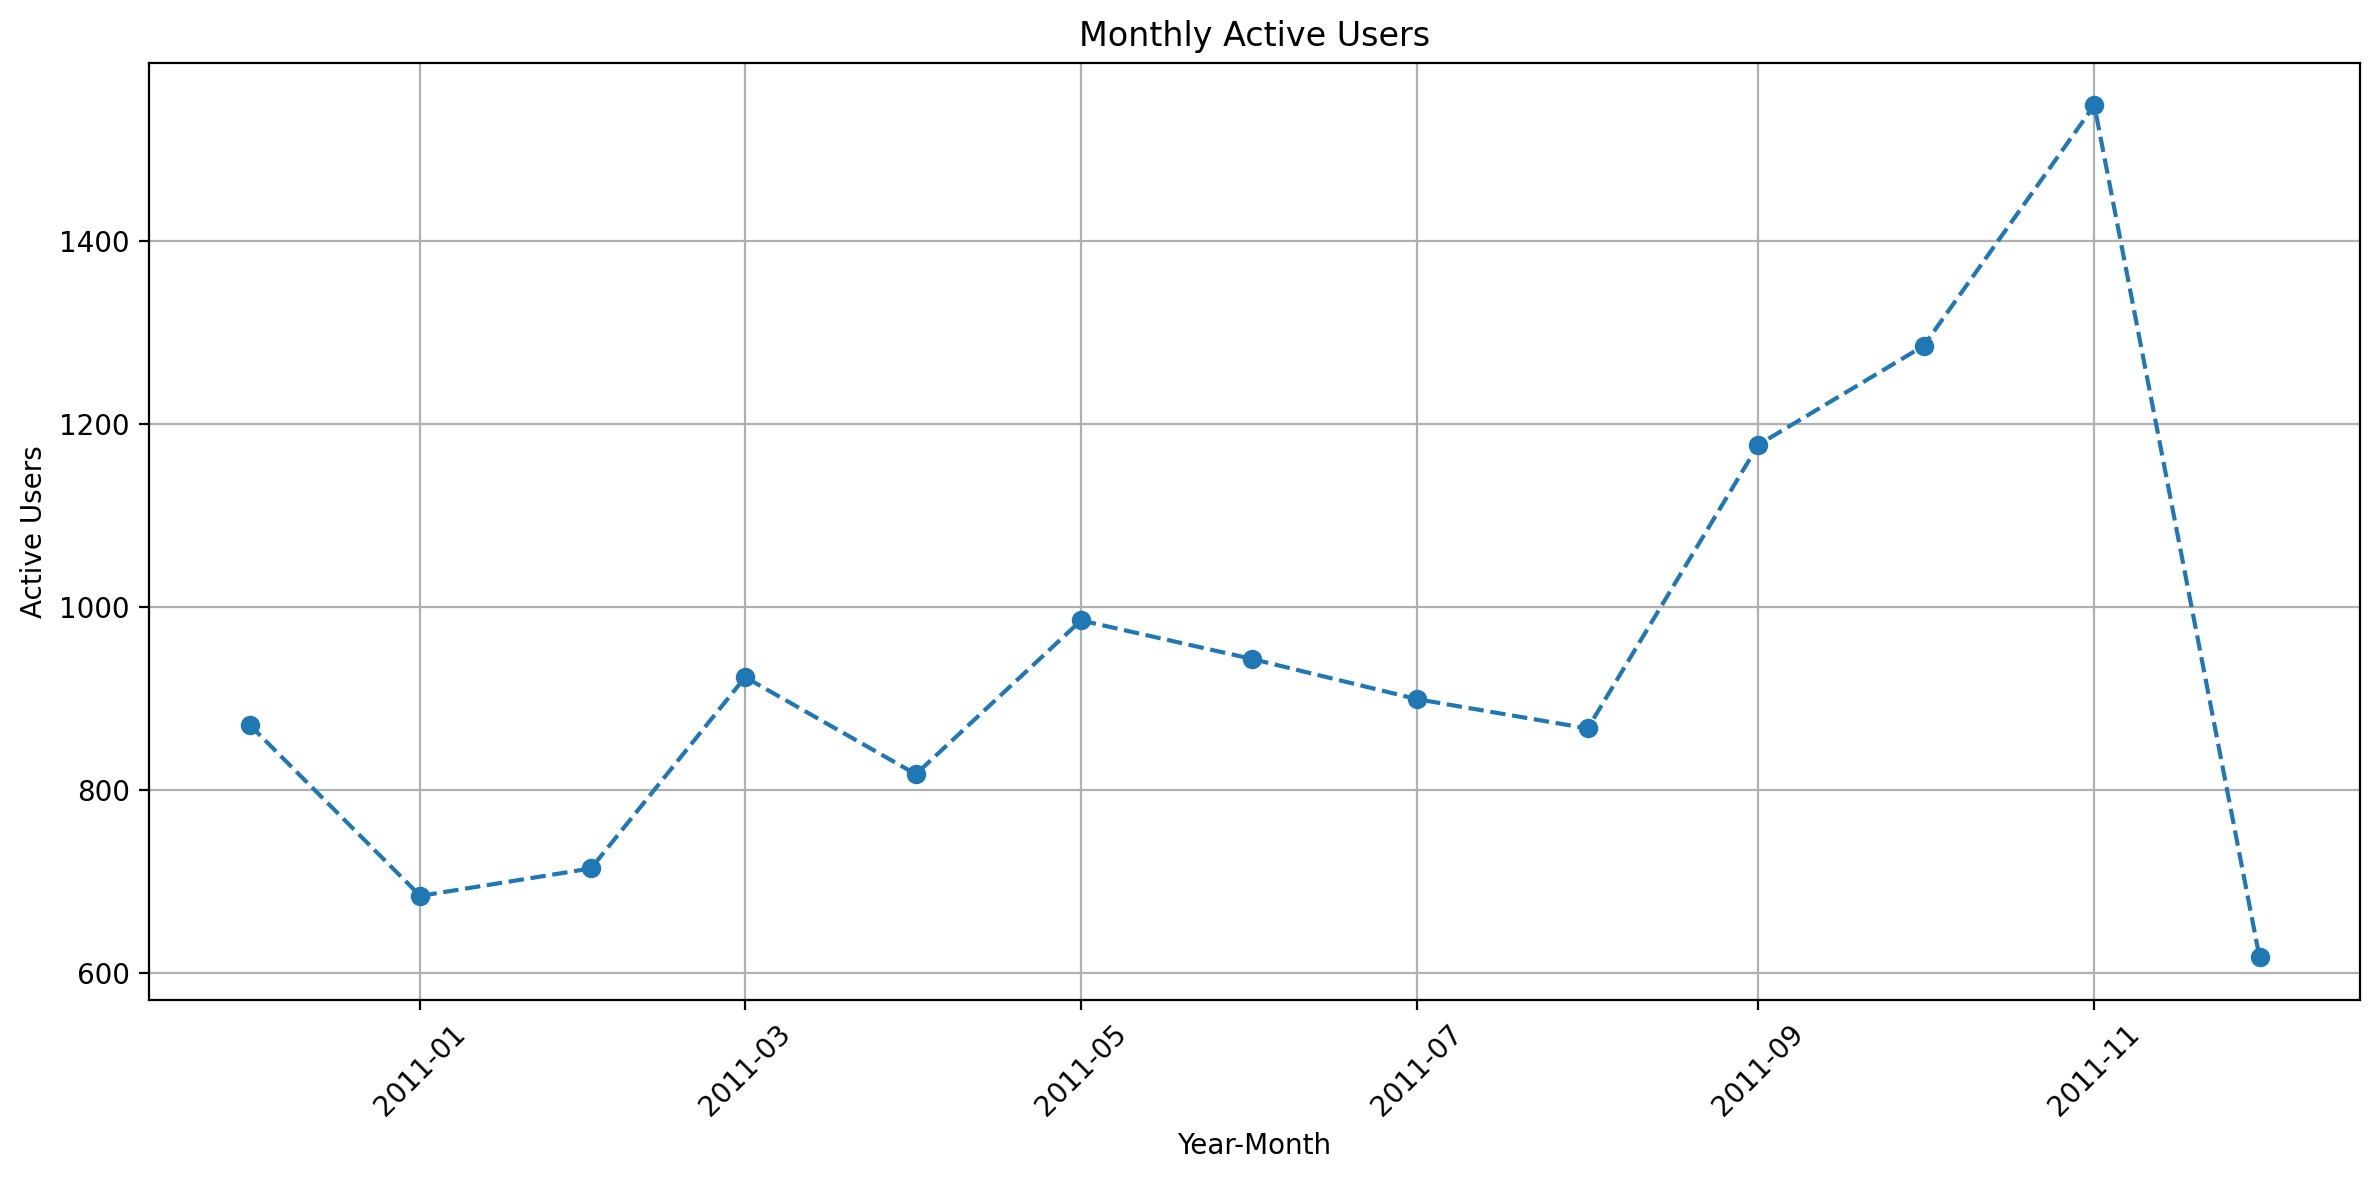

In [13]:
# Plot the data
monthly_active['InvoiceYearMonth'] = pd.to_datetime(monthly_active['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(monthly_active['InvoiceYearMonth'], monthly_active['Active Users'], marker='o', linestyle='--')
plt.title('Monthly Active Users')
plt.xlabel('Year-Month')
plt.ylabel('Active Users')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Monthly Sales By Quantity

In [14]:
monthly_sales = data.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
monthly_sales

,InvoiceYearMonth,Quantity
0,201012,336351
1,201101,413915
2,201102,241177
3,201103,344989
4,201104,301612
5,201105,344308
6,201106,361928
7,201107,356181
8,201108,350572
9,201109,508782


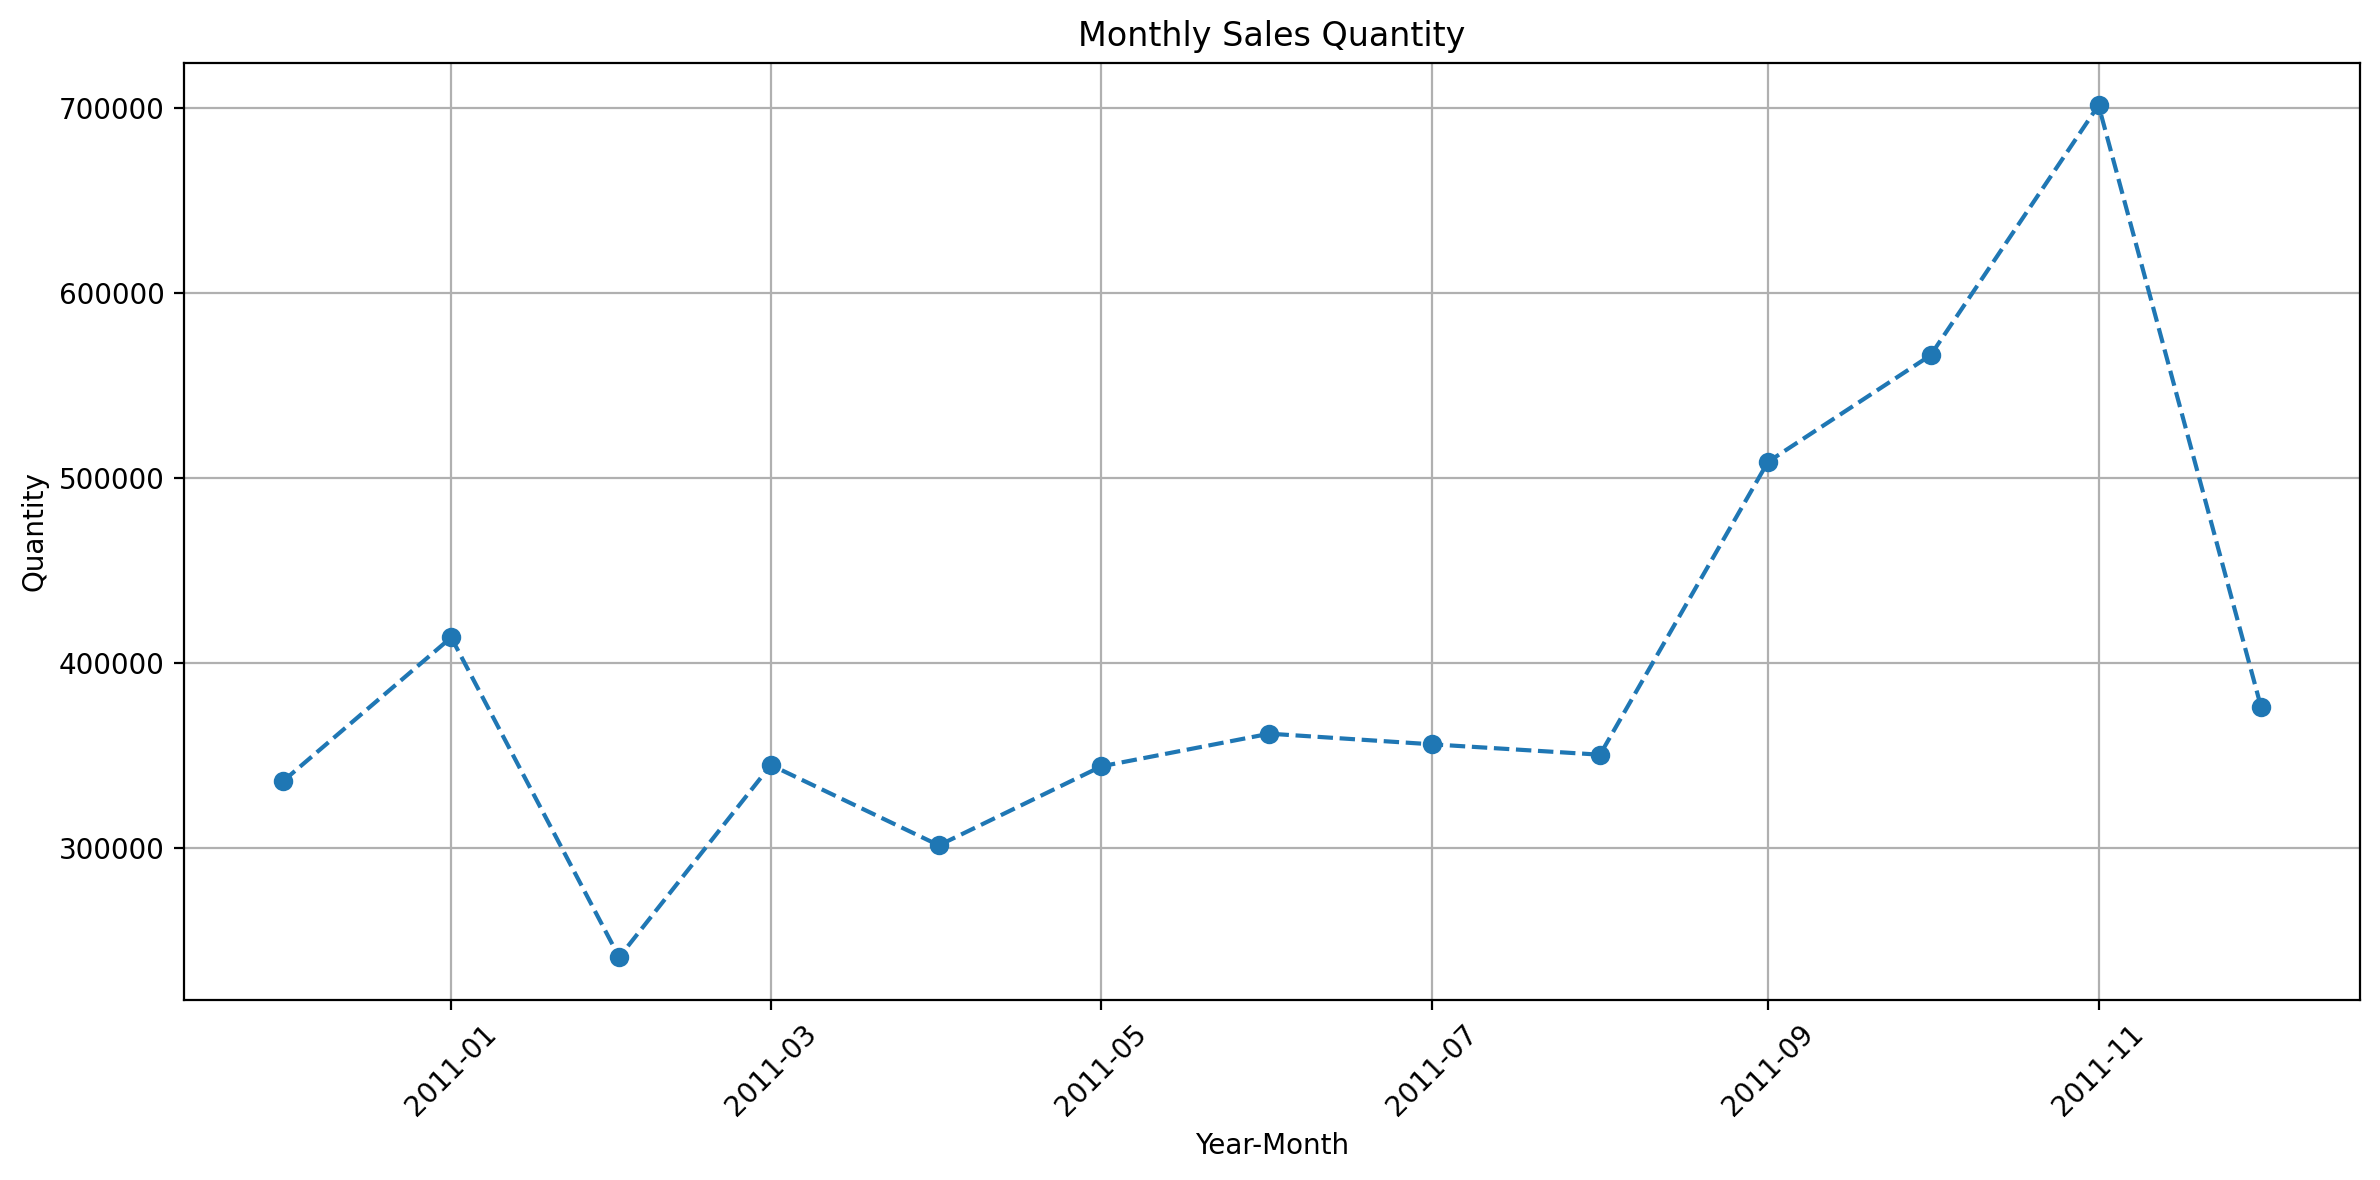

In [15]:
# Plot the data
monthly_sales['InvoiceYearMonth'] = pd.to_datetime(monthly_sales['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(monthly_sales['InvoiceYearMonth'], monthly_sales['Quantity'], marker='o', linestyle='--')
plt.title('Monthly Sales Quantity')
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Monthly Average Order

In [16]:
monthly_order_avg = data.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

#print the dataframe
monthly_order_avg.columns = ["InvoiceYearMonth","Avg. Order"]
monthly_order_avg

,InvoiceYearMonth,Avg. Order
0,201012,20.431037
1,201101,21.575914
2,201102,17.810154
3,201103,18.300426
4,201104,18.217472
5,201105,20.259232
6,201106,20.635547
7,201107,17.754139
8,201108,21.742877
9,201109,20.471631


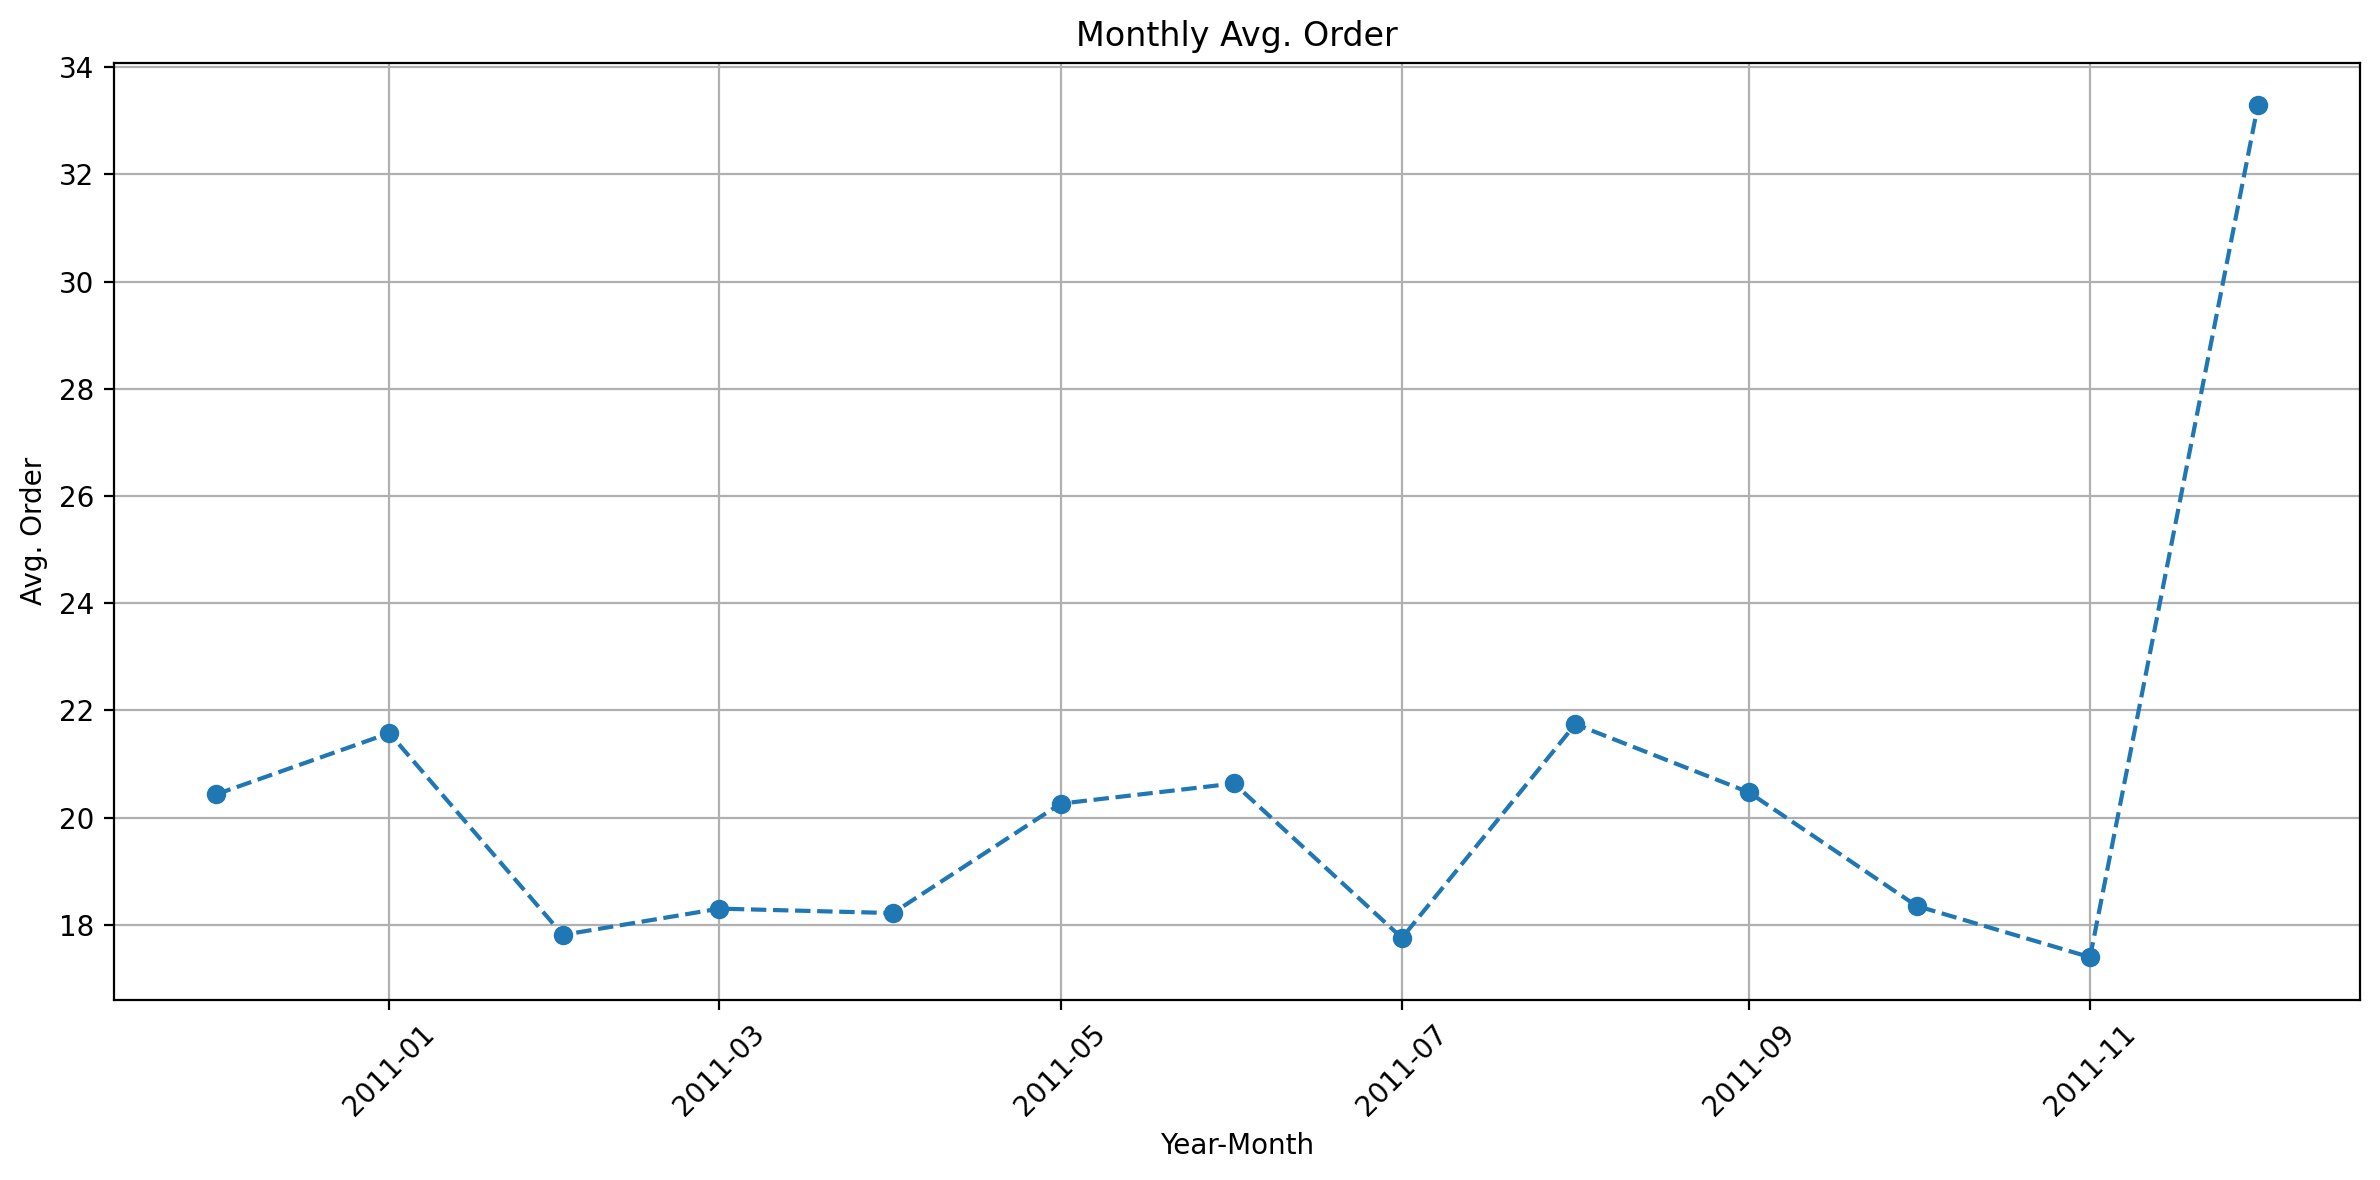

In [17]:
# Plot the data
monthly_order_avg['InvoiceYearMonth'] = pd.to_datetime(monthly_order_avg['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(monthly_order_avg['InvoiceYearMonth'], monthly_order_avg['Avg. Order'], marker='o', linestyle='--')
plt.title('Monthly Avg. Order')
plt.xlabel('Year-Month')
plt.ylabel('Avg. Order')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## New Customer Ratio

Ratio of New Customer added vs Existing Customers

In [21]:
#creating a dataframe with first purchase month added
min_purchase = data.groupby('CustomerID').InvoiceDate.min().reset_index()
min_purchase.columns = ['CustomerID','MinPurchaseDate']
min_purchase['MinPurchaseYearMonth'] = min_purchase['MinPurchaseDate'].apply(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe 
data_new = pd.merge(data, min_purchase, on='CustomerID')

data_new.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,6,2010-12-01 08:26:00,2.55,17850.0,201012,15.30,2010-12-01 08:26:00,201012
1,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012
2,8,2010-12-01 08:26:00,2.75,17850.0,201012,22.00,2010-12-01 08:26:00,201012
3,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012
4,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012


In [202]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 361877
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Quantity              361878 non-null  int32         
 1   InvoiceDate           361878 non-null  datetime64[ns]
 2   UnitPrice             361878 non-null  float64       
 3   CustomerID            361878 non-null  float64       
 4   InvoiceYearMonth      361878 non-null  int64         
 5   Revenue               361878 non-null  float64       
 6   MinPurchaseDate       361878 non-null  datetime64[ns]
 7   MinPurchaseYearMonth  361878 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2)
memory usage: 23.5 MB


In [203]:
#adding a new column marking users as new or existing(already done some purchase previously)
def users(x,y):
    if x>y:
        return "Existing"
    else:
        return "New"
    

#np.vectorize applies a function on two columns simulatenously
data_new['UserType'] =  np.vectorize(users)(data_new['InvoiceYearMonth'],data_new['MinPurchaseYearMonth'])  
    
data_new["UserType"].value_counts()

Existing    256114
New         105764
Name: UserType, dtype: int64

In [204]:
data_new.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,6,2010-12-01 08:26:00,2.55,17850.0,201012,15.30,2010-12-01 08:26:00,201012,New
1,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012,New
2,8,2010-12-01 08:26:00,2.75,17850.0,201012,22.00,2010-12-01 08:26:00,201012,New
3,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012,New
4,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,2010-12-01 08:26:00,201012,New


In [205]:
#only take new customers
new_user_each_month = data_new[data_new["UserType"] == "New"].groupby("InvoiceYearMonth")["CustomerID"].nunique()
#only take old customers
old_user_each_month = data_new[data_new["UserType"] == "Existing"].groupby("InvoiceYearMonth")["CustomerID"].nunique()

#new customer count each month divided by old customer count each month
new_customer_ratio = pd.DataFrame(new_user_each_month/old_user_each_month).reset_index()
new_customer_ratio.columns = ["InvoiceYearMonth","NewCustomerRatio"]
new_customer_ratio

,InvoiceYearMonth,NewCustomerRatio
0,201012,NaN
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878


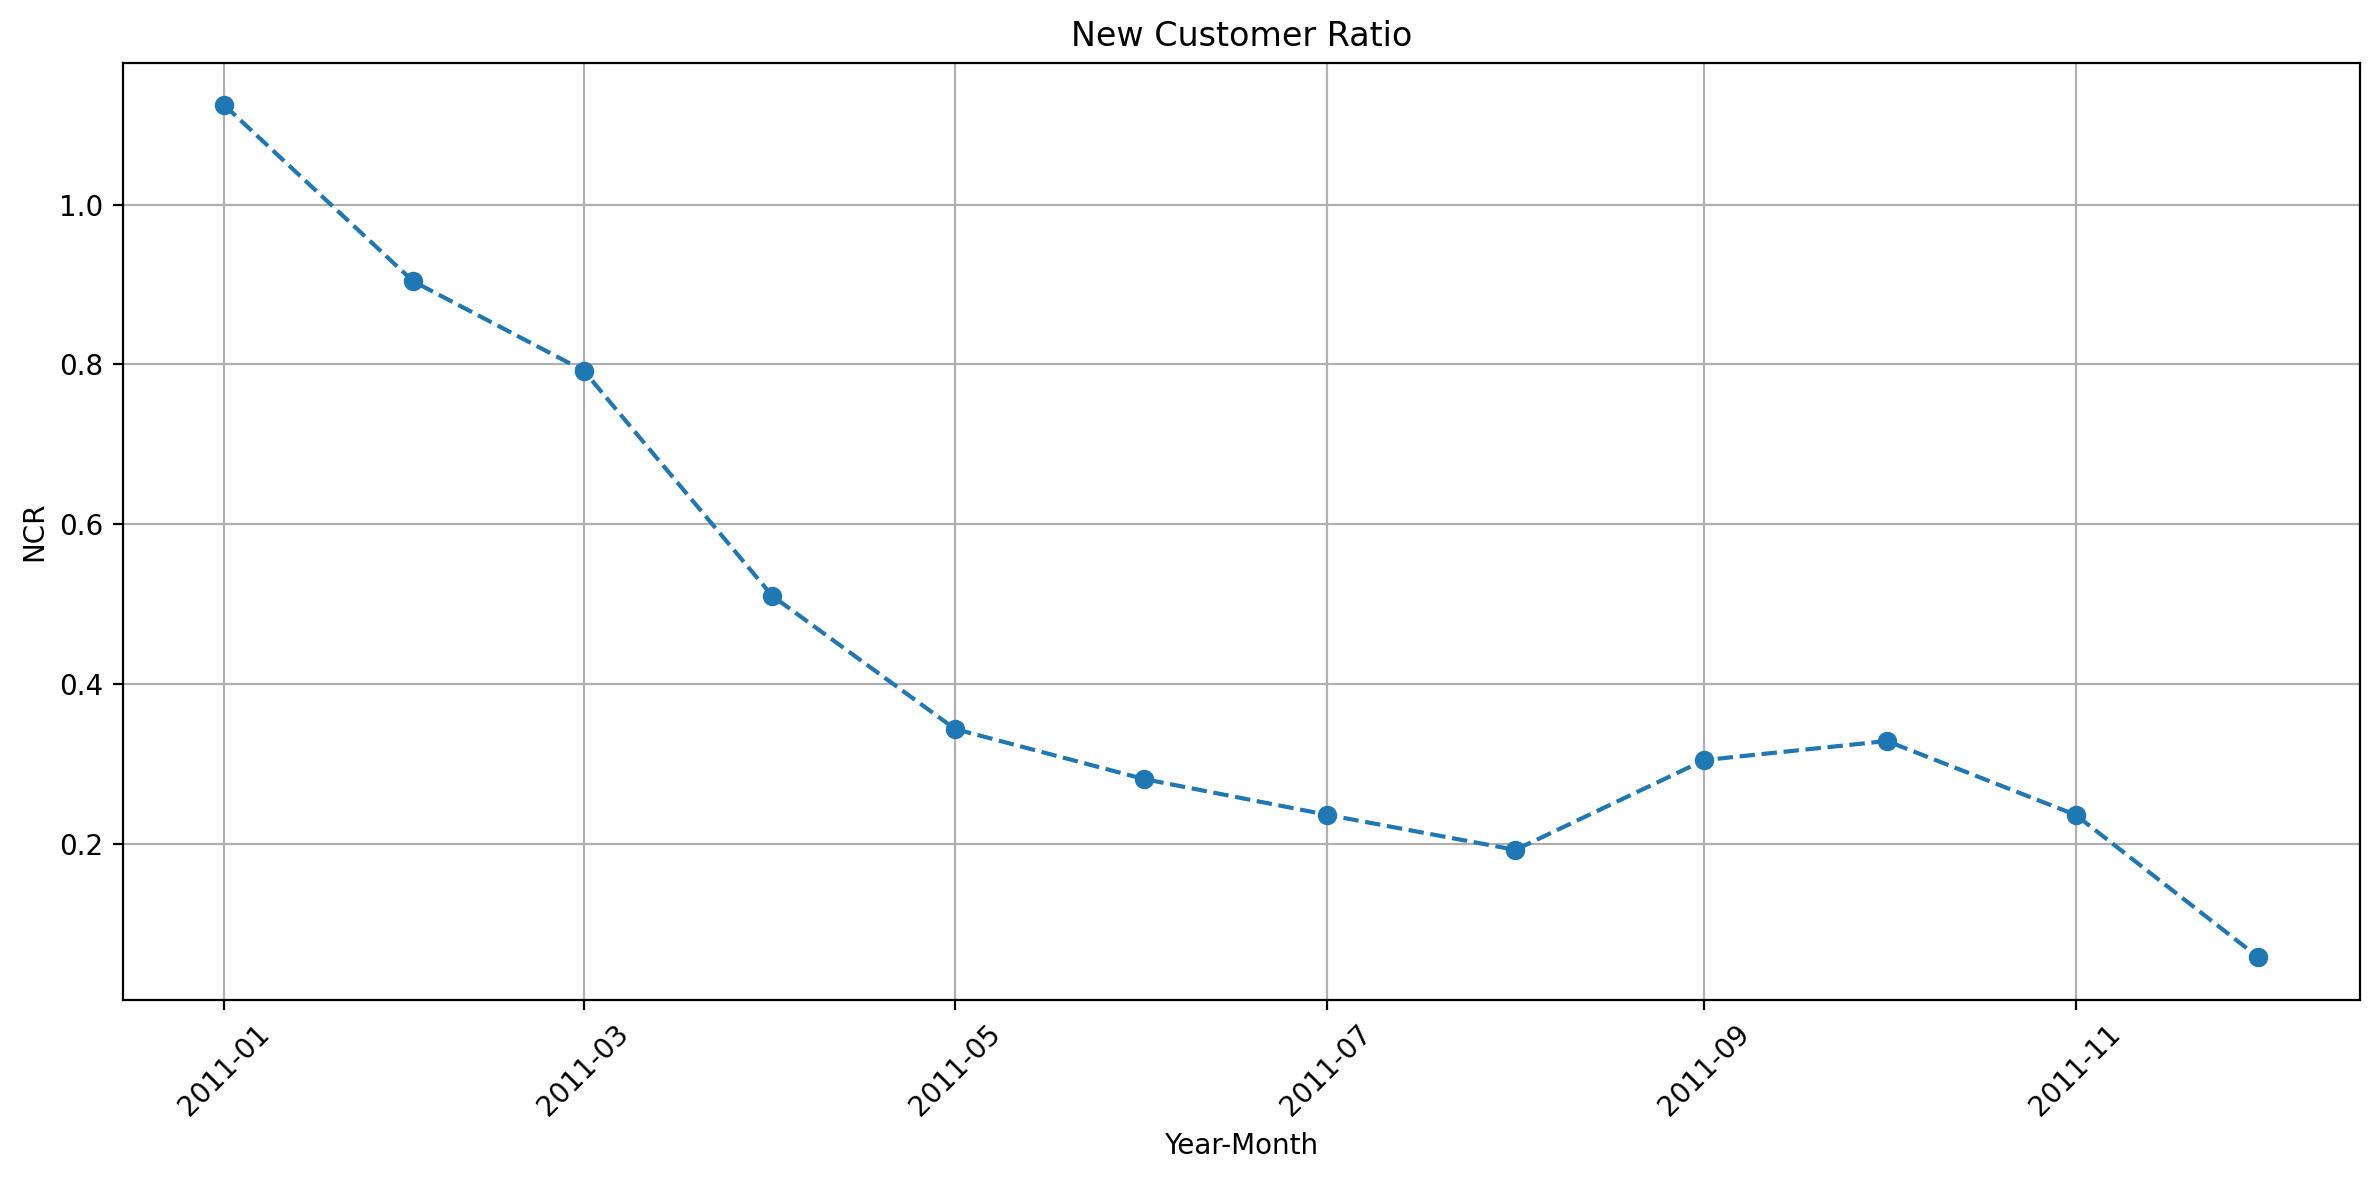

In [206]:
# Plot the data
new_customer_ratio['InvoiceYearMonth'] = pd.to_datetime(new_customer_ratio['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(new_customer_ratio['InvoiceYearMonth'], new_customer_ratio['NewCustomerRatio'], marker='o', linestyle='--')
plt.title('New Customer Ratio')
plt.xlabel('Year-Month')
plt.ylabel('NCR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

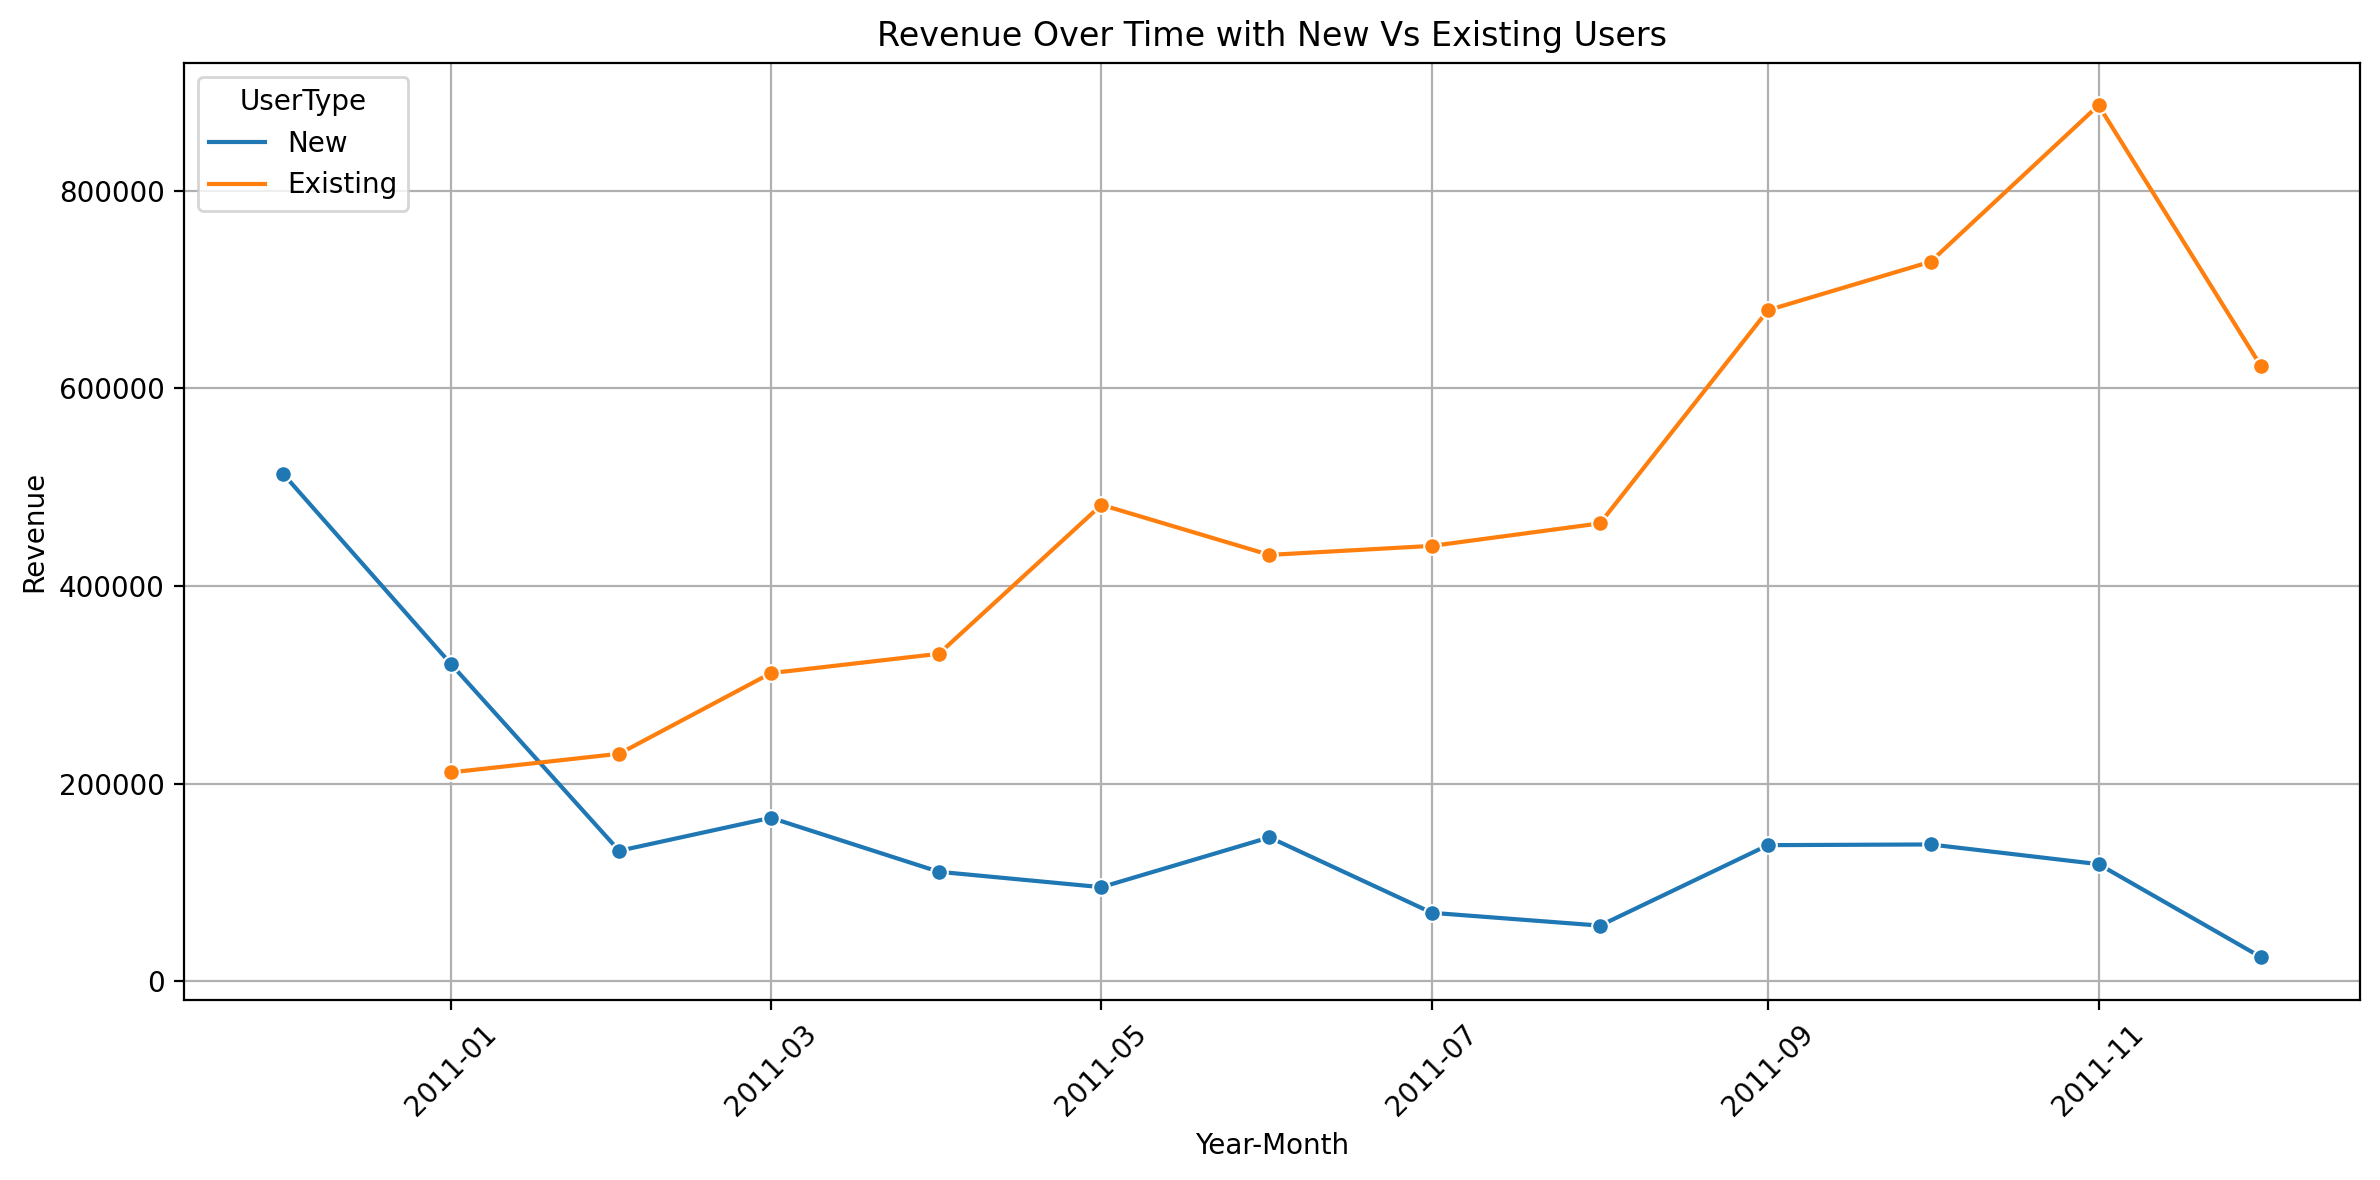

In [207]:
#New Vs existing users revenue
user_type_revenue = data_new.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6),dpi = 200)
user_type_revenue['InvoiceYearMonth'] = pd.to_datetime(user_type_revenue['InvoiceYearMonth'], format='%Y%m')
sns.lineplot(data=user_type_revenue, x='InvoiceYearMonth', y='Revenue',hue ="UserType", marker='o', linestyle='-')
plt.title('Revenue Over Time with New Vs Existing Users')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


## Monthly Retention Rate

Customer that made purchase in previous months also purchased this month

In [208]:
#identify which users are active by looking at their revenue per month
user_purchase = data_new.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,154367.20
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [209]:
#create retention matrix with crosstab which shows which users purchased soemthing on which month
retention_crosstab = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth']).reset_index()

retention_crosstab.head()


InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [210]:
#create an array of dictionary which keeps Retained & Total User count for each month


months = retention_crosstab.columns[2:]
#create an empty list
retention_array = []
for i in range(len(months)-1):
    #it is empty dictionary which will be added with three key value pair and finally appended into a retention_array list
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    #selected month
    retention_data['InvoiceYearMonth'] = int(selected_month)
    #total user in selected month
    retention_data['TotalUserCount'] = retention_crosstab[selected_month].sum()
    #total users that were present in previous month and this month also
    #data is first filtered for above condition and then sum is taken
    retention_data['RetainedUserCount'] = retention_crosstab[(retention_crosstab[selected_month]>0) & (retention_crosstab[prev_month]>0)][selected_month].sum()
    #append the key value pair in dictionary
    retention_array.append(retention_data)
    #next loop will add more values to same keys
    
#convert the retention_array list to dataframe and calculate Retention Rate
retention_df = pd.DataFrame(retention_array)
retention_df['RetentionRate'] = retention_df['RetainedUserCount']/retention_df['TotalUserCount']


    
retention_df

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


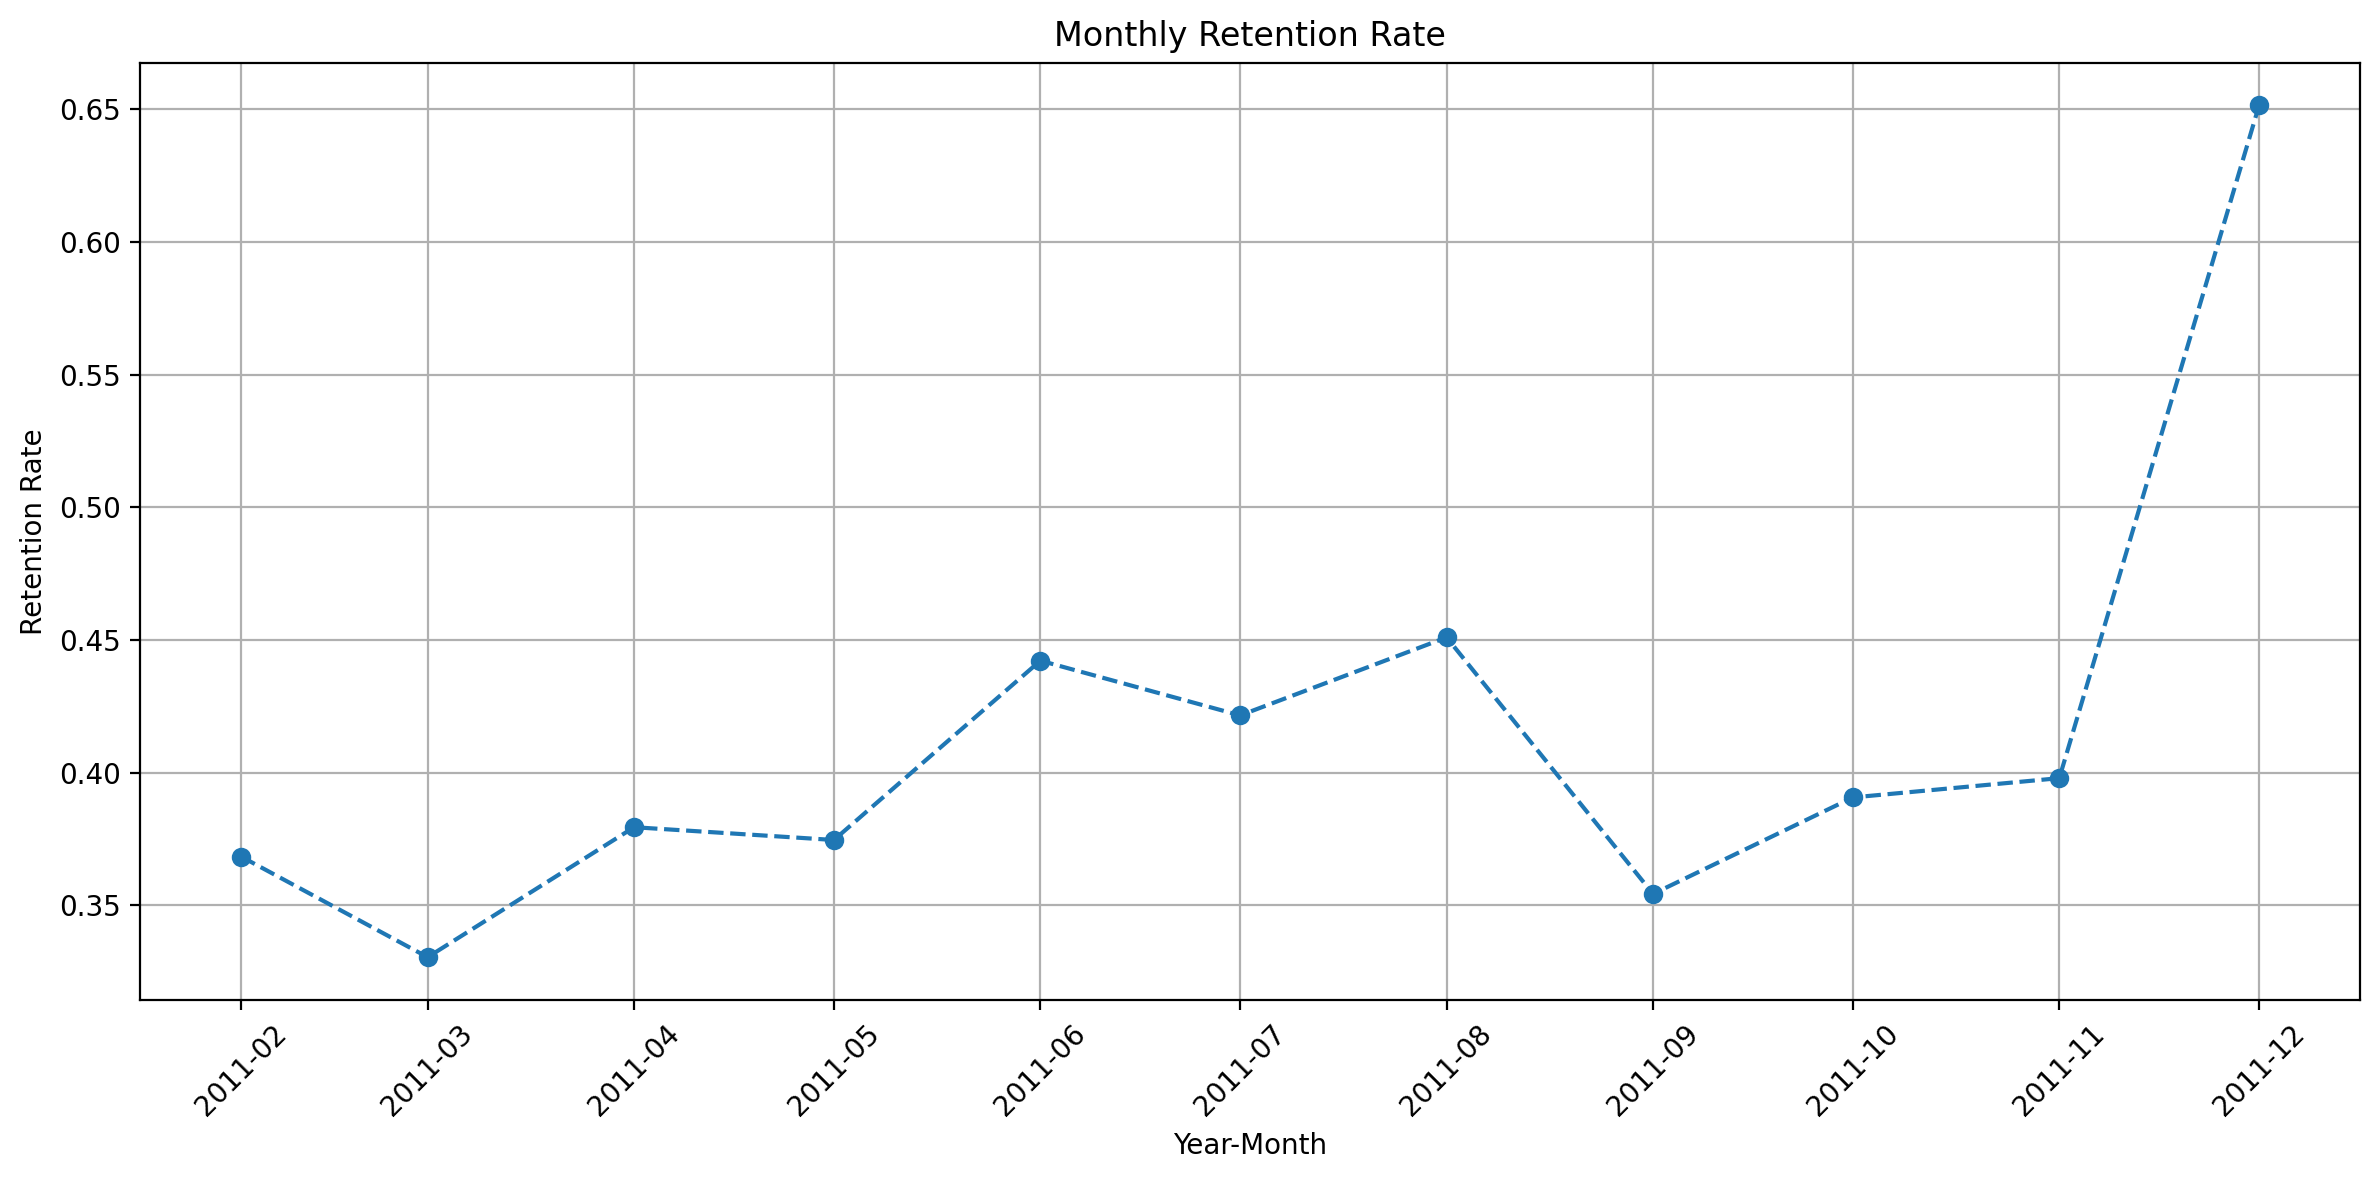

In [211]:
# Plot the data
retention_df['InvoiceYearMonth'] = pd.to_datetime(retention_df['InvoiceYearMonth'], format='%Y%m')
plt.figure(figsize=(12, 6),dpi = 200)
plt.plot(retention_df['InvoiceYearMonth'], retention_df['RetentionRate'], marker='o', linestyle='--')
plt.title('Monthly Retention Rate')
plt.xlabel('Year-Month')
plt.ylabel('Retention Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

## Cohort Based Retention

Number of customers made purchase in a selected month returns back on a particular month

In [212]:
months = retention_crosstab.columns[2:]
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    #list of all previous months
    prev_months = months[:i]
    #list of all coming months
    next_months = months[i+1:]
    for prev_month in prev_months:
        #mark all previous month as Nan
        retention_data[prev_month] = np.nan
    
    #count total users in a month
    total_users_selected_month = retention_crosstab[selected_month].sum()
    retention_data['TotalUserCount'] = total_users_selected_month
    #mark 1 for current month
    retention_data[selected_month] = 1
    
    #for each in next month
    for next_month in next_months:
        #count users that are common in selected month and next considered month
        common_users = retention_crosstab[(retention_crosstab[selected_month]>0) & (retention_crosstab[next_month]>0)][selected_month].sum()
        #divide above sum by total users
        retention_data[next_month] = np.round(common_users/total_users_selected_month,decimals=2)
    
    retention_array.append(retention_data)

    
    
Cohort_based_retention = pd.DataFrame(retention_array)
Cohort_based_retention.index = months
Cohort_based_retention

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,684,1.0,0.38,0.44,0.39,0.47,0.43,0.40,0.40,0.46,0.43,0.52,0.29
201102,714,NaN,1.00,0.43,0.39,0.48,0.44,0.42,0.41,0.45,0.43,0.49,0.27
201103,923,NaN,NaN,1.00,0.34,0.45,0.42,0.39,0.37,0.43,0.40,0.48,0.25
201104,817,NaN,NaN,NaN,1.00,0.45,0.44,0.41,0.40,0.45,0.42,0.49,0.24
201105,985,NaN,NaN,NaN,NaN,1.00,0.42,0.42,0.41,0.44,0.42,0.50,0.25
201106,943,NaN,NaN,NaN,NaN,NaN,1.00,0.40,0.42,0.48,0.45,0.51,0.25
201107,899,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.43,0.46,0.46,0.53,0.26
201108,867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.48,0.45,0.54,0.28
201109,1177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.43,0.54,0.27


## Customer Segmentation

## Recency

#Gap between no. of days customer made the last puchase

In [213]:
#get the max purchase date(last recorded date of each customer) for each customer and create a dataframe with it
max_purchase = data_new.groupby('CustomerID')["InvoiceDate"].max().reset_index()
max_purchase.columns = ['CustomerID','MaxPurchaseDate']
max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [214]:
#we take our observation point as the max invoice date in our dataset
max_purchase['Recency'] = (max_purchase['MaxPurchaseDate'].max() - max_purchase['MaxPurchaseDate']).dt.days
max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [215]:
data_new1 = pd.DataFrame(data_new['CustomerID'].unique())
data_new1.columns = ['CustomerID']
data_new1.head()


,CustomerID
0,17850.0
1,13047.0
2,13748.0
3,15100.0
4,15291.0


In [216]:
data_new1 = pd.merge(data_new1, max_purchase[['CustomerID','Recency']], on='CustomerID')
data_new1.head()


,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,13748.0,95
3,15100.0,329
4,15291.0,25


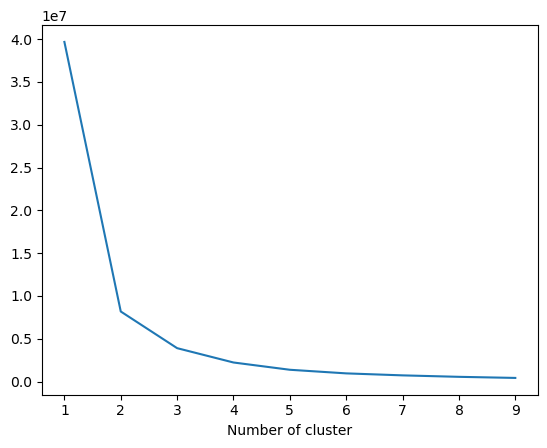

In [217]:
#Elbow method to select number of clusters
from sklearn.cluster import KMeans

sse={}
recency = data_new1[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [120]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_new1[['Recency']])
data_new1['RecencyCluster'] = kmeans.predict(data_new1[['Recency']])
data_new1.head()

,CustomerID,Recency,RecencyCluster
0,17850.0,301,1
1,13047.0,31,2
2,13748.0,95,0
3,15100.0,329,1
4,15291.0,25,2


In [122]:
#2nd cluster has low recency and cluster 1 has highest recency
df1 = data_new1.groupby("RecencyCluster")['Recency'].mean().reset_index()
df1.head()


,RecencyCluster,Recency
0,0,77.679245
1,1,304.393305
2,2,17.488205
3,3,184.625000


In [123]:
#adding average recency back to main data frame
data_new1 = data_new1.drop("Recency",axis=1)
recency_df = pd.merge(data_new1,df1,on ="RecencyCluster")
recency_df.columns = ["CustomerID","RecencyCluster","Avg. Recency"]
recency_df

,CustomerID,RecencyCluster,Avg. Recency
0,17850.0,1,304.393305
1,15100.0,1,304.393305
2,18074.0,1,304.393305
3,16250.0,1,304.393305
4,13747.0,1,304.393305
...,...,...,...
3945,15942.0,3,184.625000
3946,14143.0,3,184.625000
3947,16147.0,3,184.625000
3948,15149.0,3,184.625000


In [124]:
#we want receny clusters in increasing order meaning high value of clusters implies low recency
recency_df["RecencyCluster"]=recency_df["RecencyCluster"].map({3:1,2:3,0:2,1:0})

In [125]:
recency_df

,CustomerID,RecencyCluster,Avg. Recency
0,17850.0,0,304.393305
1,15100.0,0,304.393305
2,18074.0,0,304.393305
3,16250.0,0,304.393305
4,13747.0,0,304.393305
...,...,...,...
3945,15942.0,1,184.625000
3946,14143.0,1,184.625000
3947,16147.0,1,184.625000
3948,15149.0,1,184.625000


## Frequency Cluster

#Number of times a customer made a purchase in whole dataset

In [137]:
frequency = data_new.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']
frequency

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59
...,...,...
3945,18280.0,10
3946,18281.0,7
3947,18282.0,13
3948,18283.0,756


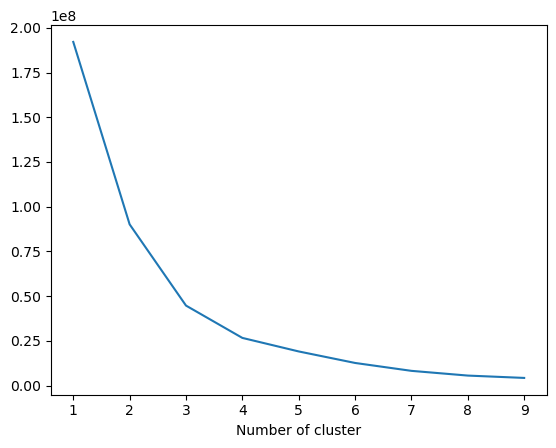

In [138]:
#Elbow method to select number of clusters
from sklearn.cluster import KMeans

sse={}
frequency_copy = frequency[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency_copy)
    frequency_copy["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [140]:
#AGAIN we choose 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency[['Frequency']])
frequency['FrequencyCluster'] = kmeans.predict(frequency[['Frequency']])
frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,2,0
1,12747.0,103,0
2,12748.0,4642,1
3,12749.0,231,2
4,12820.0,59,0


In [141]:
#1st cluster has best frequency
df2 = frequency.groupby("FrequencyCluster")["Frequency"].mean().reset_index()
df2.columns = ["FrequencyCluster","Avg. Frequency"]
df2

,FrequencyCluster,Avg. Frequency
0,0,49.525744
1,1,5917.666667
2,2,331.221445
3,3,1313.136364


In [142]:
#higher frequency means high cluster value
df2["FrequencyCluster"] = df2["FrequencyCluster"].map({0:0,2:1,3:2,1:3})

In [143]:
frequency = frequency.drop("Frequency",axis =1)
Frequency_df = pd.merge(frequency,df2,on = "FrequencyCluster")
Frequency_df

,CustomerID,FrequencyCluster,Avg. Frequency
0,12346.0,0,49.525744
1,12747.0,0,49.525744
2,12820.0,0,49.525744
3,12821.0,0,49.525744
4,12822.0,0,49.525744
...,...,...,...
3945,16549.0,3,5917.666667
3946,16931.0,3,5917.666667
3947,17511.0,3,5917.666667
3948,17811.0,3,5917.666667


## Revenue

In [218]:
revenue = data_new.groupby('CustomerID').Revenue.sum().reset_index()
revenue

,CustomerID,Revenue
0,12346.0,154367.20
1,12747.0,4196.01
2,12748.0,38367.36
3,12749.0,4313.56
4,12820.0,942.34
...,...,...
3945,18280.0,180.60
3946,18281.0,80.82
3947,18282.0,179.50
3948,18283.0,2094.88


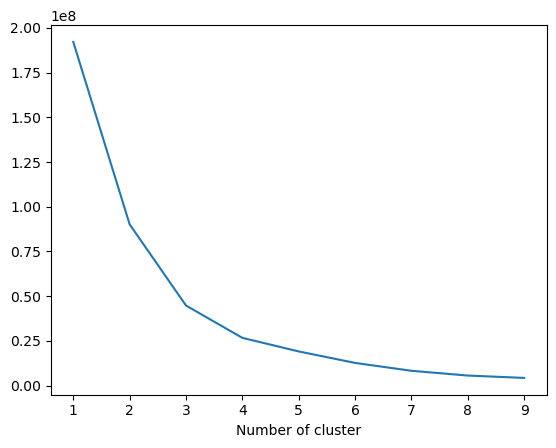

In [219]:
#Elbow method to select number of clusters
from sklearn.cluster import KMeans

sse={}
revenue_copy = revenue[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency_copy)
    revenue_copy['clusters'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [220]:
#AGAIN we choose 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(revenue[['Revenue']])
revenue['RevenueCluster'] = kmeans.predict(revenue[['Revenue']])
revenue.head()

,CustomerID,Revenue,RevenueCluster
0,12346.0,154367.20,2
1,12747.0,4196.01,0
2,12748.0,38367.36,3
3,12749.0,4313.56,0
4,12820.0,942.34,0


In [221]:
df3 = revenue.groupby("RevenueCluster")["Revenue"].mean().reset_index()
df3.columns = ["RevenueCluster","Avg. Revenue"]
df3

,RevenueCluster,Avg. Revenue
0,0,1182.333918
1,1,267145.873333
2,2,73110.795000
3,3,16751.254684


In [222]:
#high cluster value for high revenue
df3["RevenueCluster"] = df3["RevenueCluster"].map({0:0,3:1,2:2,1:3})

In [223]:
revenue = revenue.drop("Revenue",axis =1)
Revenue_df = pd.merge(revenue,df3, on = "RevenueCluster")
Revenue_df

,CustomerID,RevenueCluster,Avg. Revenue
0,12346.0,2,73110.795000
1,12931.0,2,73110.795000
2,13089.0,2,73110.795000
3,13694.0,2,73110.795000
4,14088.0,2,73110.795000
...,...,...,...
3945,17865.0,3,267145.873333
3946,18092.0,3,267145.873333
3947,16446.0,1,16751.254684
3948,17450.0,1,16751.254684


## RFM Segmentation

In [224]:
df4 = pd.merge(recency_df,Frequency_df,on = "CustomerID")
RFM_df = pd.merge(df4,Revenue_df,on = "CustomerID")
RFM_df

,CustomerID,RecencyCluster,Avg. Recency,FrequencyCluster,Avg. Frequency,RevenueCluster,Avg. Revenue
0,17850.0,0,304.393305,2,1313.136364,0,1182.333918
1,15100.0,0,304.393305,0,49.525744,0,1182.333918
2,18074.0,0,304.393305,0,49.525744,0,1182.333918
3,16250.0,0,304.393305,0,49.525744,0,1182.333918
4,13747.0,0,304.393305,0,49.525744,0,1182.333918
...,...,...,...,...,...,...,...
3945,15942.0,1,184.625000,0,49.525744,0,1182.333918
3946,14143.0,1,184.625000,0,49.525744,0,1182.333918
3947,16147.0,1,184.625000,0,49.525744,0,1182.333918
3948,15149.0,1,184.625000,0,49.525744,0,1182.333918


In [225]:
#calculating overall score, higher is better
RFM_df["RFM_Score"] = RFM_df["RecencyCluster"] + RFM_df["FrequencyCluster"] +RFM_df["RevenueCluster"]
RFM_df

,CustomerID,RecencyCluster,Avg. Recency,FrequencyCluster,Avg. Frequency,RevenueCluster,Avg. Revenue,RFM_Score
0,17850.0,0,304.393305,2,1313.136364,0,1182.333918,2
1,15100.0,0,304.393305,0,49.525744,0,1182.333918,0
2,18074.0,0,304.393305,0,49.525744,0,1182.333918,0
3,16250.0,0,304.393305,0,49.525744,0,1182.333918,0
4,13747.0,0,304.393305,0,49.525744,0,1182.333918,0
...,...,...,...,...,...,...,...,...
3945,15942.0,1,184.625000,0,49.525744,0,1182.333918,1
3946,14143.0,1,184.625000,0,49.525744,0,1182.333918,1
3947,16147.0,1,184.625000,0,49.525744,0,1182.333918,1
3948,15149.0,1,184.625000,0,49.525744,0,1182.333918,1


In [234]:
RFM_df["RFM_Score"].describe()

count    3950.000000
mean        2.411392
std         1.543206
min         0.000000
25%         1.000000
50%         3.000000
75%         3.000000
max         9.000000
Name: RFM_Score, dtype: float64

In [235]:
#function for customer segmentation
#0 to 3 is low value
#4 to 6 is mid value
#6 to 9 is high value
def custseg(x):
    if 0 <= x < 4:
        return "Low Value"
    elif 4 <= x < 7:
        return "Mid Value"
    else:
        return "High Value"

In [236]:
RFM_df["Segment"] = RFM_df["RFM_Score"].apply(custseg)
RFM_df

,CustomerID,RecencyCluster,Avg. Recency,FrequencyCluster,Avg. Frequency,RevenueCluster,Avg. Revenue,RFM_Score,Segment
0,17850.0,0,304.393305,2,1313.136364,0,1182.333918,2,Low Value
1,15100.0,0,304.393305,0,49.525744,0,1182.333918,0,Low Value
2,18074.0,0,304.393305,0,49.525744,0,1182.333918,0,Low Value
3,16250.0,0,304.393305,0,49.525744,0,1182.333918,0,Low Value
4,13747.0,0,304.393305,0,49.525744,0,1182.333918,0,Low Value
...,...,...,...,...,...,...,...,...,...
3945,15942.0,1,184.625000,0,49.525744,0,1182.333918,1,Low Value
3946,14143.0,1,184.625000,0,49.525744,0,1182.333918,1,Low Value
3947,16147.0,1,184.625000,0,49.525744,0,1182.333918,1,Low Value
3948,15149.0,1,184.625000,0,49.525744,0,1182.333918,1,Low Value


## Defining Decision Boundary based on Visualization

In [237]:
#merging diffrennt dataframe to get revenue,segment and recency in a common dataframe
df5 = pd.merge(data,RFM_df[["CustomerID","Segment"]],on = "CustomerID",how = "left")
df6 = pd.merge(df5,max_purchase,on = "CustomerID",how = "left")
df6

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue,Segment,MaxPurchaseDate,Recency
0,6,2010-12-01 08:26:00,2.55,17850.0,201012,15.30,Low Value,2011-02-10 14:38:00,301.0
1,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,2011-02-10 14:38:00,301.0
2,8,2010-12-01 08:26:00,2.75,17850.0,201012,22.00,Low Value,2011-02-10 14:38:00,301.0
3,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,2011-02-10 14:38:00,301.0
4,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,2011-02-10 14:38:00,301.0
...,...,...,...,...,...,...,...,...,...
495473,12,2011-12-09 12:31:00,1.95,15804.0,201112,23.40,Mid Value,2011-12-09 12:31:00,0.0
495474,8,2011-12-09 12:49:00,2.95,13113.0,201112,23.60,High Value,2011-12-09 12:49:00,0.0
495475,24,2011-12-09 12:49:00,1.25,13113.0,201112,30.00,High Value,2011-12-09 12:49:00,0.0
495476,24,2011-12-09 12:49:00,8.95,13113.0,201112,214.80,High Value,2011-12-09 12:49:00,0.0


## Revenue Vs Recency

<Axes: xlabel='Recency', ylabel='Revenue'>

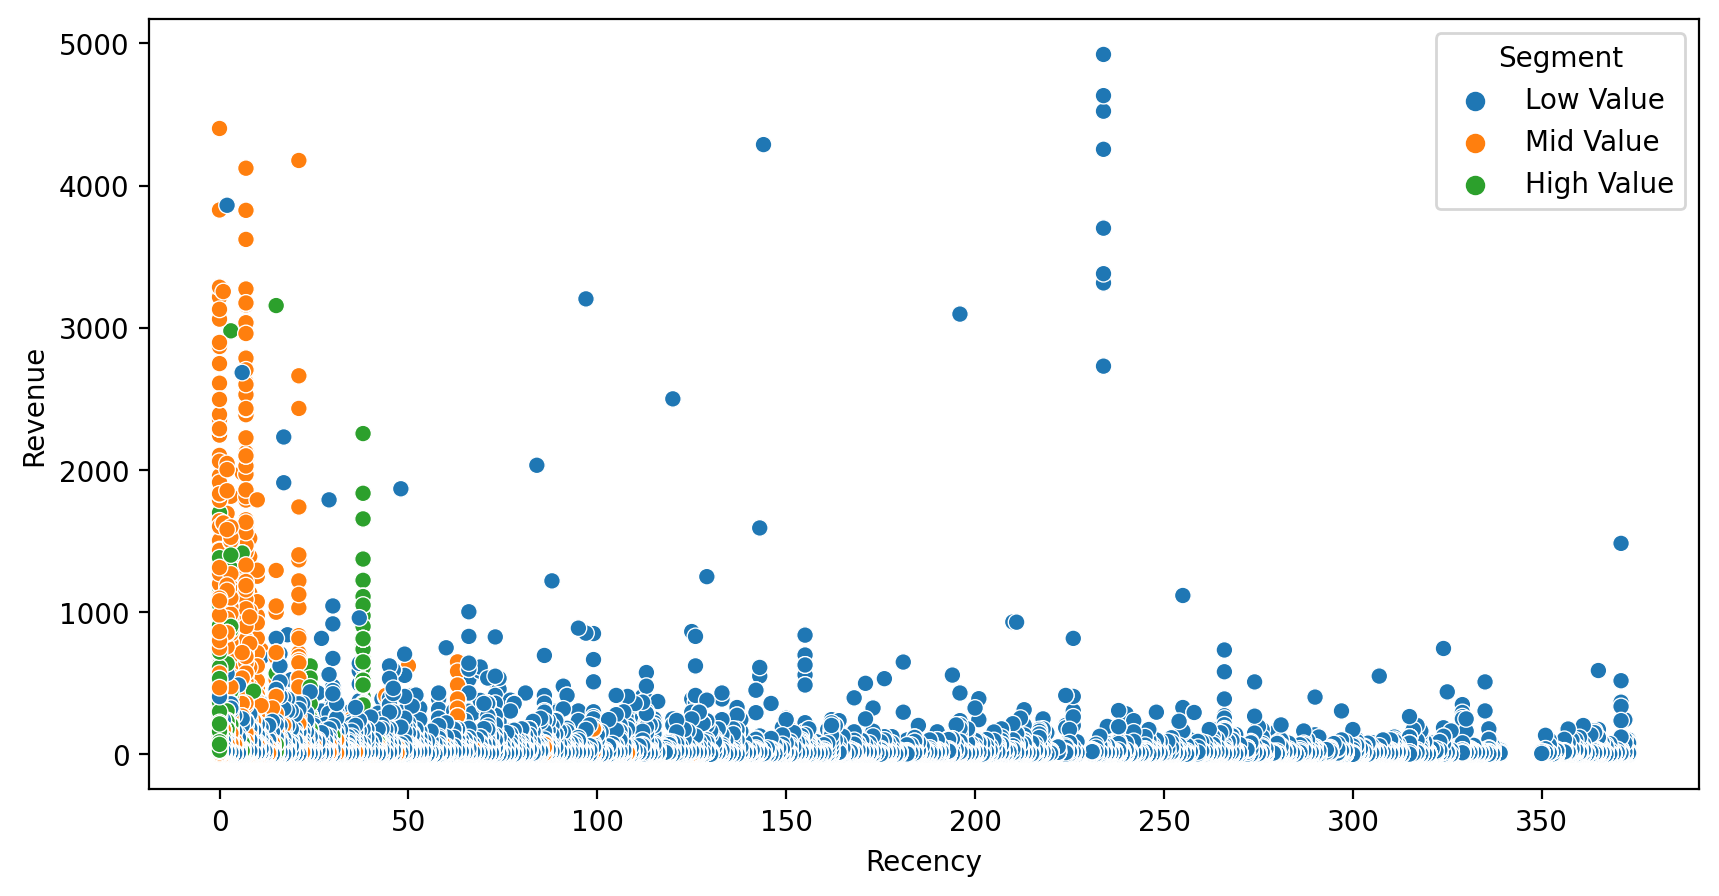

In [256]:
#revenue above 5000 alraedy termed as high value customer
#if more than 50 days recency is there , then very low chances that we get a good customer
fig = plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df6[df6["Revenue"]<5000],x = "Recency",y = "Revenue",hue= "Segment")

In [241]:
df7 = data_new.groupby('CustomerID').InvoiceDate.count().reset_index()
df7.columns = ['CustomerID','Frequency']
df8 = pd.merge(df5,df7,on = "CustomerID",how = "left")
df8

,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYearMonth,Revenue,Segment,Frequency
0,6,2010-12-01 08:26:00,2.55,17850.0,201012,15.30,Low Value,312.0
1,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,312.0
2,8,2010-12-01 08:26:00,2.75,17850.0,201012,22.00,Low Value,312.0
3,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,312.0
4,6,2010-12-01 08:26:00,3.39,17850.0,201012,20.34,Low Value,312.0
...,...,...,...,...,...,...,...,...
495473,12,2011-12-09 12:31:00,1.95,15804.0,201112,23.40,Mid Value,274.0
495474,8,2011-12-09 12:49:00,2.95,13113.0,201112,23.60,High Value,280.0
495475,24,2011-12-09 12:49:00,1.25,13113.0,201112,30.00,High Value,280.0
495476,24,2011-12-09 12:49:00,8.95,13113.0,201112,214.80,High Value,280.0


## Revenue Vs Frequency

<Axes: xlabel='Frequency', ylabel='Revenue'>

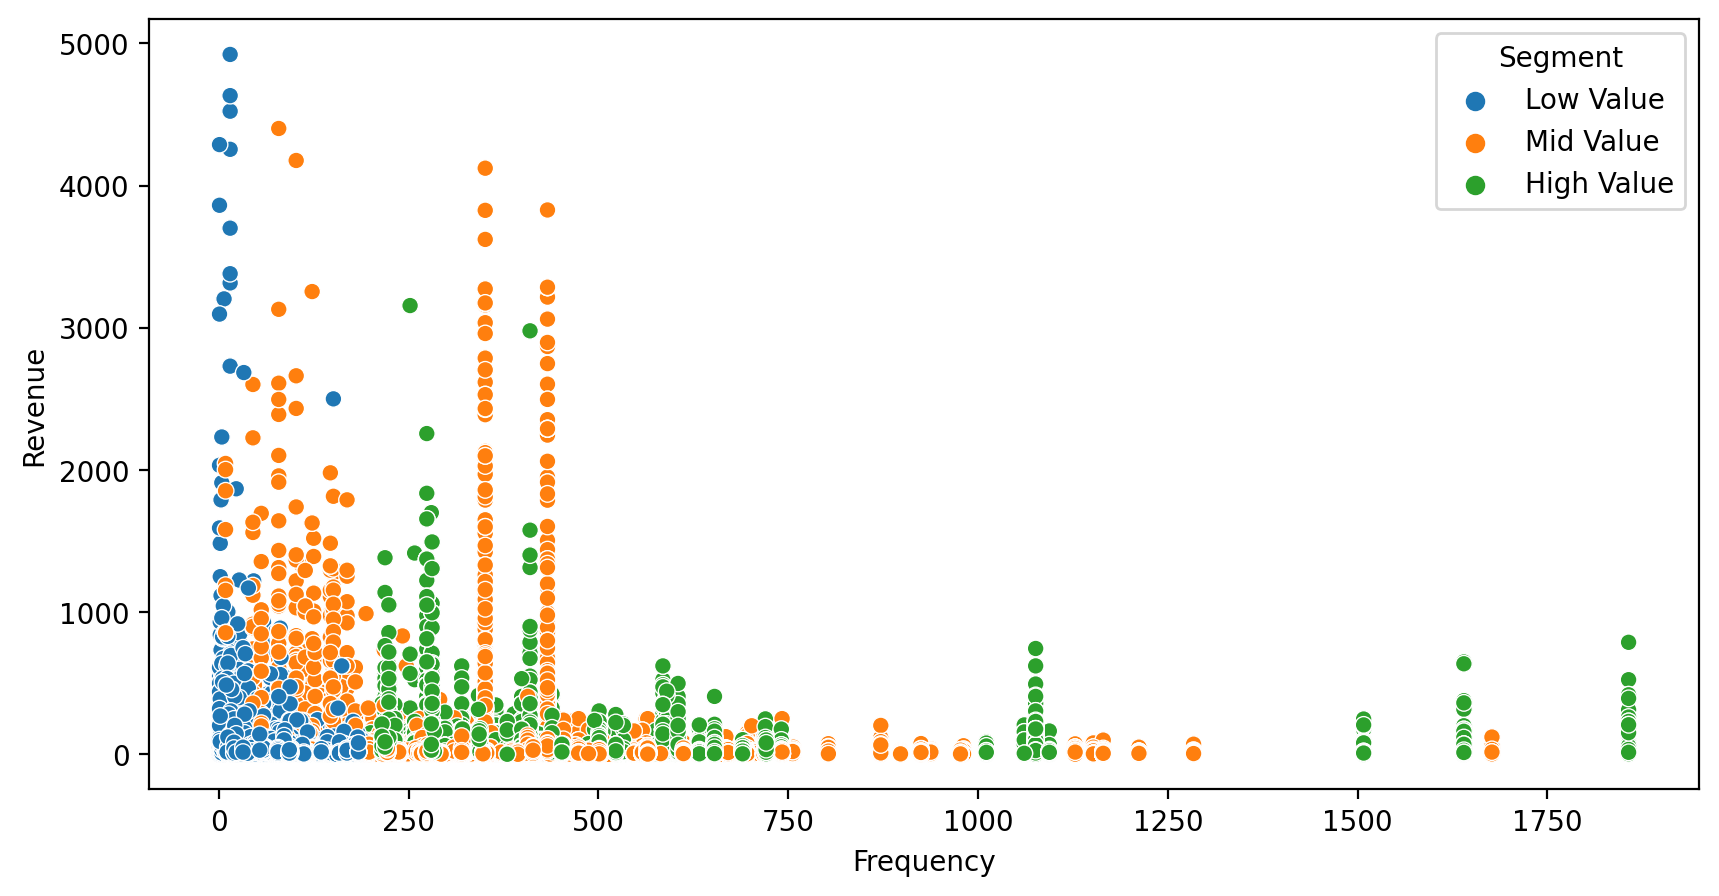

In [257]:
#if frequency is less than 200 purchases and revenue is less than 100, more likely we find a low value customer
#frequency also curbed with 2000 for better visulatization
fig = plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df8[(df8["Revenue"]<5000) & (df8["Frequency"]<2000)],x ="Frequency",y ="Revenue",hue="Segment")

In [259]:
df9 = pd.merge(df6,df7,on = "CustomerID",how = "left")

## Recency Vs Frequency

<Axes: xlabel='Frequency', ylabel='Recency'>

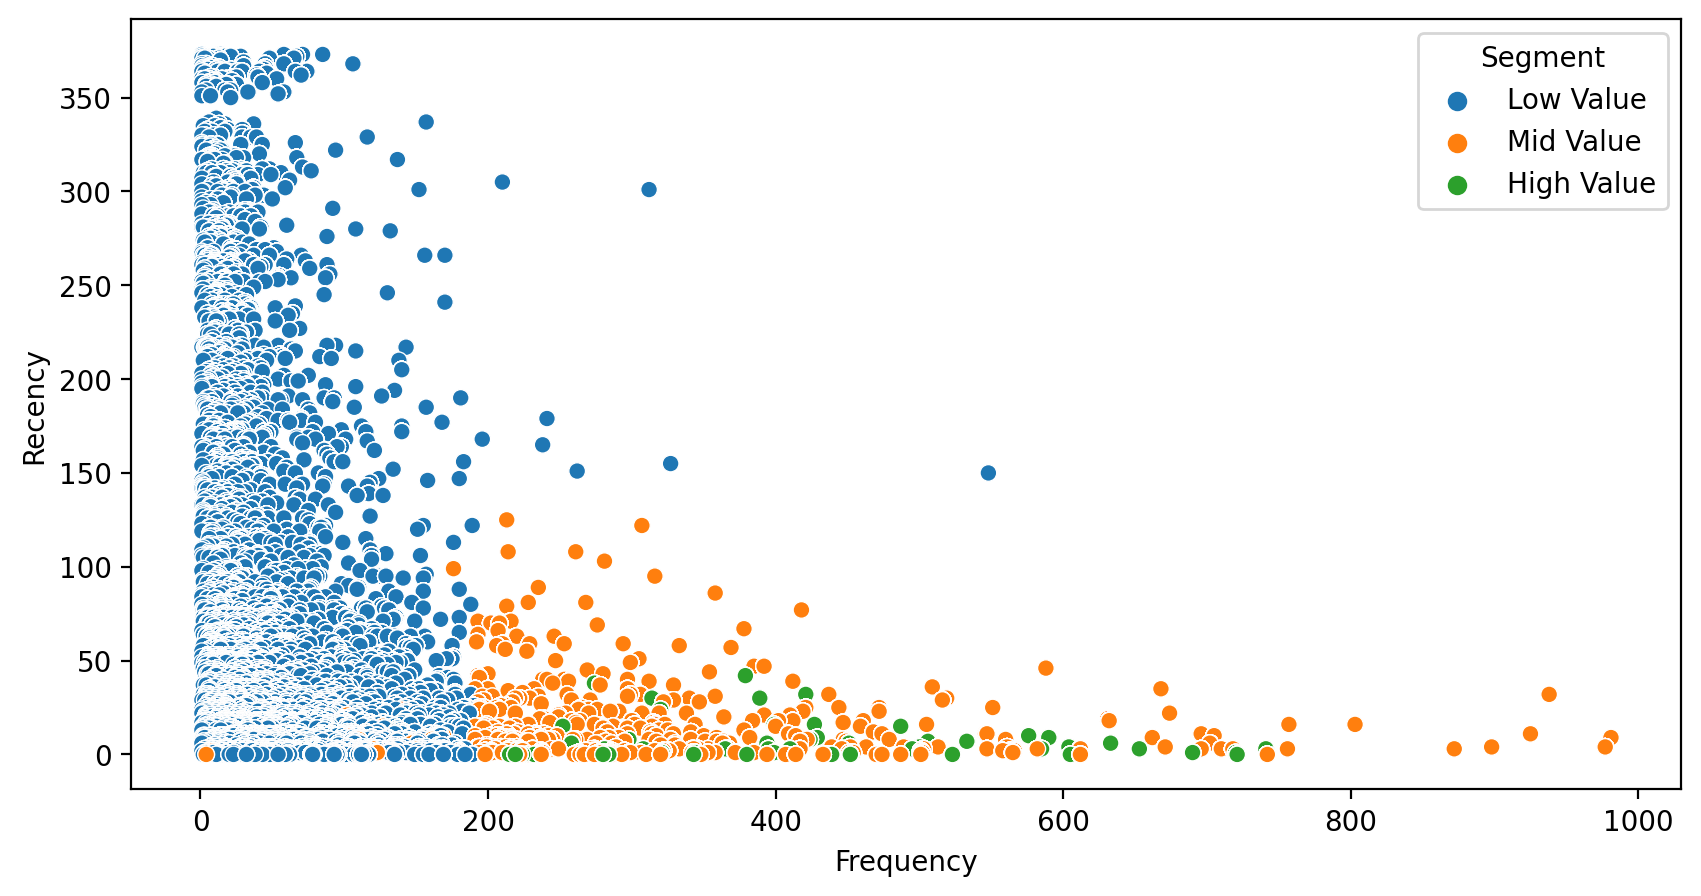

In [264]:
#less than 200 frequency , most likely a low value customer
fig = plt.figure(figsize=(10,5),dpi=200)
sns.scatterplot(data=df9[df9["Frequency"]<1000],x ="Frequency",y ="Recency",hue="Segment")